# Base Plotting w/ MatPlotlib

Following the initial success of my Seaborn notebook, I have come across multiple situations where the plots there are too rigid for my taste. As such, I've found myself turning to Matplotlib for its flexibility. 

**Bottom line: Matplotlib can do everything I want, it just usually takes a bit longer.**

However, that doesn't really matter if I've already got the code written. This notebook is intended to be something of a recipe book for plots in Matplotlib. I anticipate having sections of different plots with different variations in each. Thus, if I find that I need a very specific type of plot, I should either:

* Be able to find it here
* Add it here for future reference. 

That's the plan, so I'll start with importing the trusty Iris dataset from Seaborn:

In [1]:
import seaborn as sns
import pandas as pd
from matplotlib import transforms, pyplot as plt
import numpy as np
from scipy.stats import linregress
from matplotlib.colors import LogNorm
import matplotlib

%matplotlib inline

# Load the Iris dataset
iris_df = sns.load_dataset("iris")
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


As a last bit, I'm going to set plot size and make plots easier to see:

In [2]:
# Set default plot sizes (width x height)
plt.rcParams['figure.figsize'] = [25, 12]

# Set plots to be super crisp
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

Now then, off to the first tool in my toolbox: Histograms!

## Histograms

These will follow the following progression:

* Basic Histogram
* Cumulative Histogram
* Normalized Histogram
* Multiple Histograms

### Basic Histogram

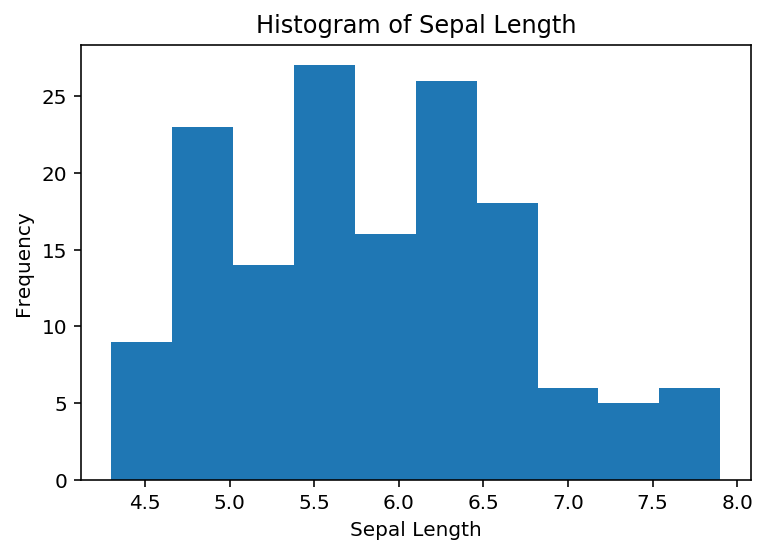

In [3]:
# Histogram of sepal_length
plt.hist(iris_df['sepal_length'])
plt.xlabel('Sepal Length')
plt.ylabel('Frequency')
plt.title('Histogram of Sepal Length')
plt.show()

### Cumulative Histogram

I'm finding that oftentimes, it's even more useful to do it cumulatively. Takes just 1 keyword change:

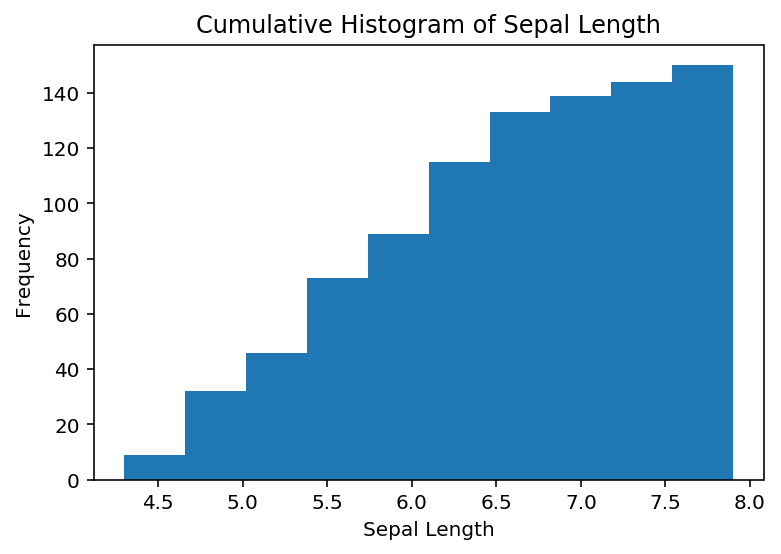

In [4]:
# Cumulative histogram of sepal_length
plt.hist(iris_df['sepal_length'], cumulative=True)
plt.xlabel('Sepal Length')
plt.ylabel('Frequency')
plt.title('Cumulative Histogram of Sepal Length')
plt.show()

### Normalized Histogram

This turns it into a density plot, which is particular useful for comparing 2 different populations. Again, just 1 keyword difference:

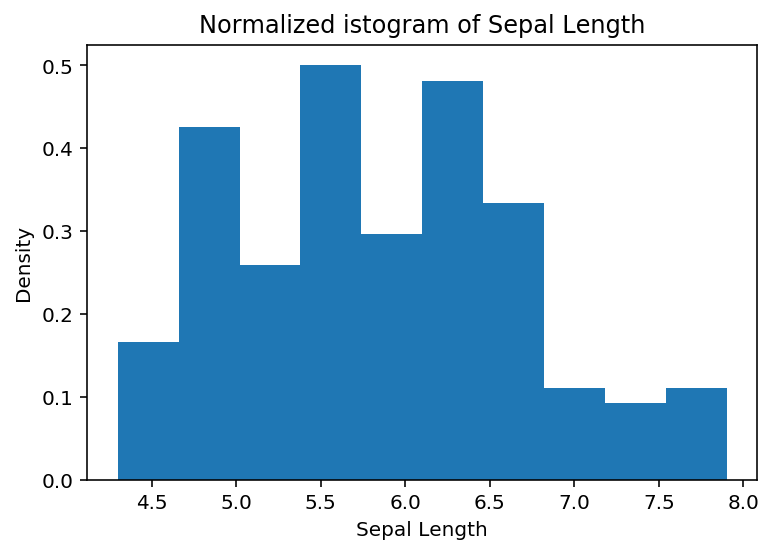

In [5]:
# Normalized histogram of sepal_length
plt.hist(iris_df['sepal_length'], density=True)
plt.xlabel('Sepal Length')
plt.ylabel('Density')
plt.title('Normalized istogram of Sepal Length')
plt.show()

### Multiple Histograms

Here I'm going to make a little function; it's going to take in the data to plot, then make a histogram for each and overlay them. It'll be super!

In [6]:
# Define the multi-histogram function
def multiHist(data_list, name_list, feature):
    '''Given a list of data, make multiple histograms'''
    
    # Plot them 
    _ = [plt.hist(item[feature], density = True, alpha = 0.5) for item in data_list]
    
    # Make a legend and labels
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.legend(name_list)
    plt.show()

Now I'll use it for the different species

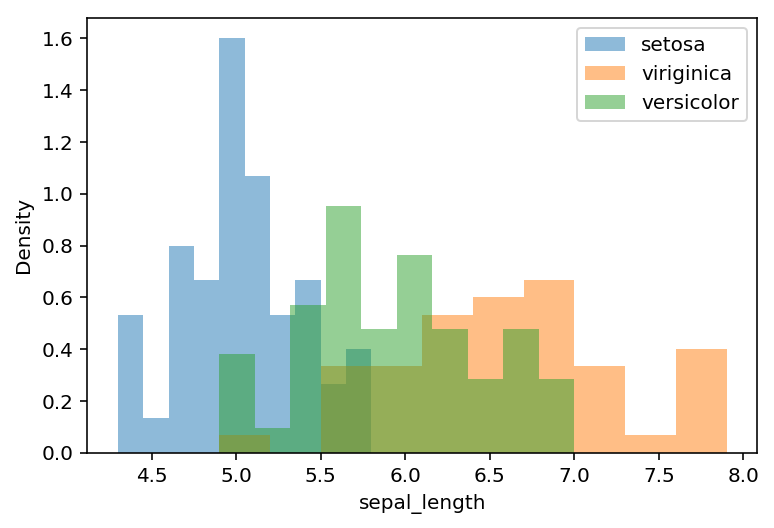

In [7]:
# Divide species into list
species_list = [iris_df[iris_df.species == 'setosa'],
                iris_df[iris_df.species == 'virginica'],
                iris_df[iris_df.species == 'versicolor']]

# Plot them
multiHist(species_list, ['setosa', 'viriginica', 'versicolor'], 'sepal_length')

Clearly, I could add in a title and things like that if I were doing a more specific version. I could also change to be a cumulative plot too. But it's pretty straightforward to do here. 

Now I'll move on to another basic chart: Bar Plots!

## Bar Plots

These are best for comparing data categorically; I'm going to do the following varieties:

* Standard bar plot
* Multiple overlayed bars
* Multiple stacked bars
* Multiple grouped bars

I will also explore horizontal bar plots; I'll do these within each category

First, I'll make some grouped data to use:

In [8]:
# Group on species and get averages for everything else
grouped_data = iris_df.groupby('species').mean()
print(grouped_data)

            sepal_length  sepal_width  petal_length  petal_width
species                                                         
setosa             5.006        3.428         1.462        0.246
versicolor         5.936        2.770         4.260        1.326
virginica          6.588        2.974         5.552        2.026


Now then, the standard bar plot:

### Standard Bar Plot

For these ones, let's just plot the sepal length for each species

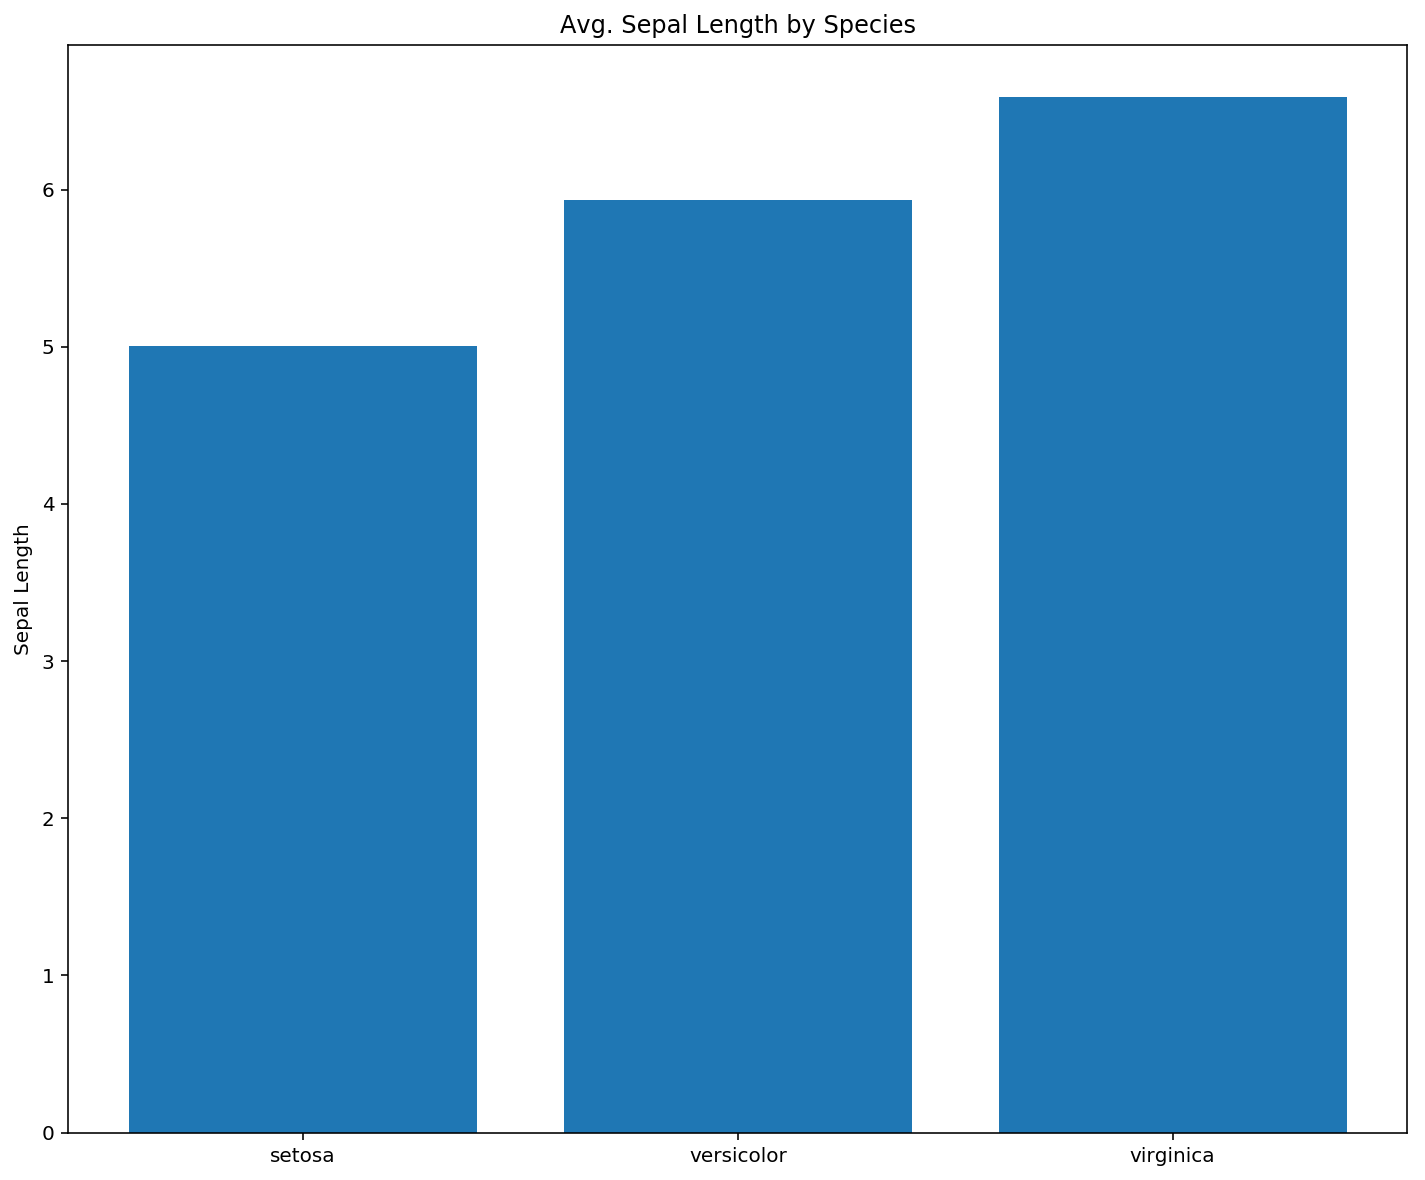

In [9]:
plt.figure(figsize = (12,10))
plt.bar(grouped_data.index, grouped_data['sepal_length'])
plt.ylabel('Sepal Length')
plt.title('Avg. Sepal Length by Species')
plt.show()

We can also do it horizontally:

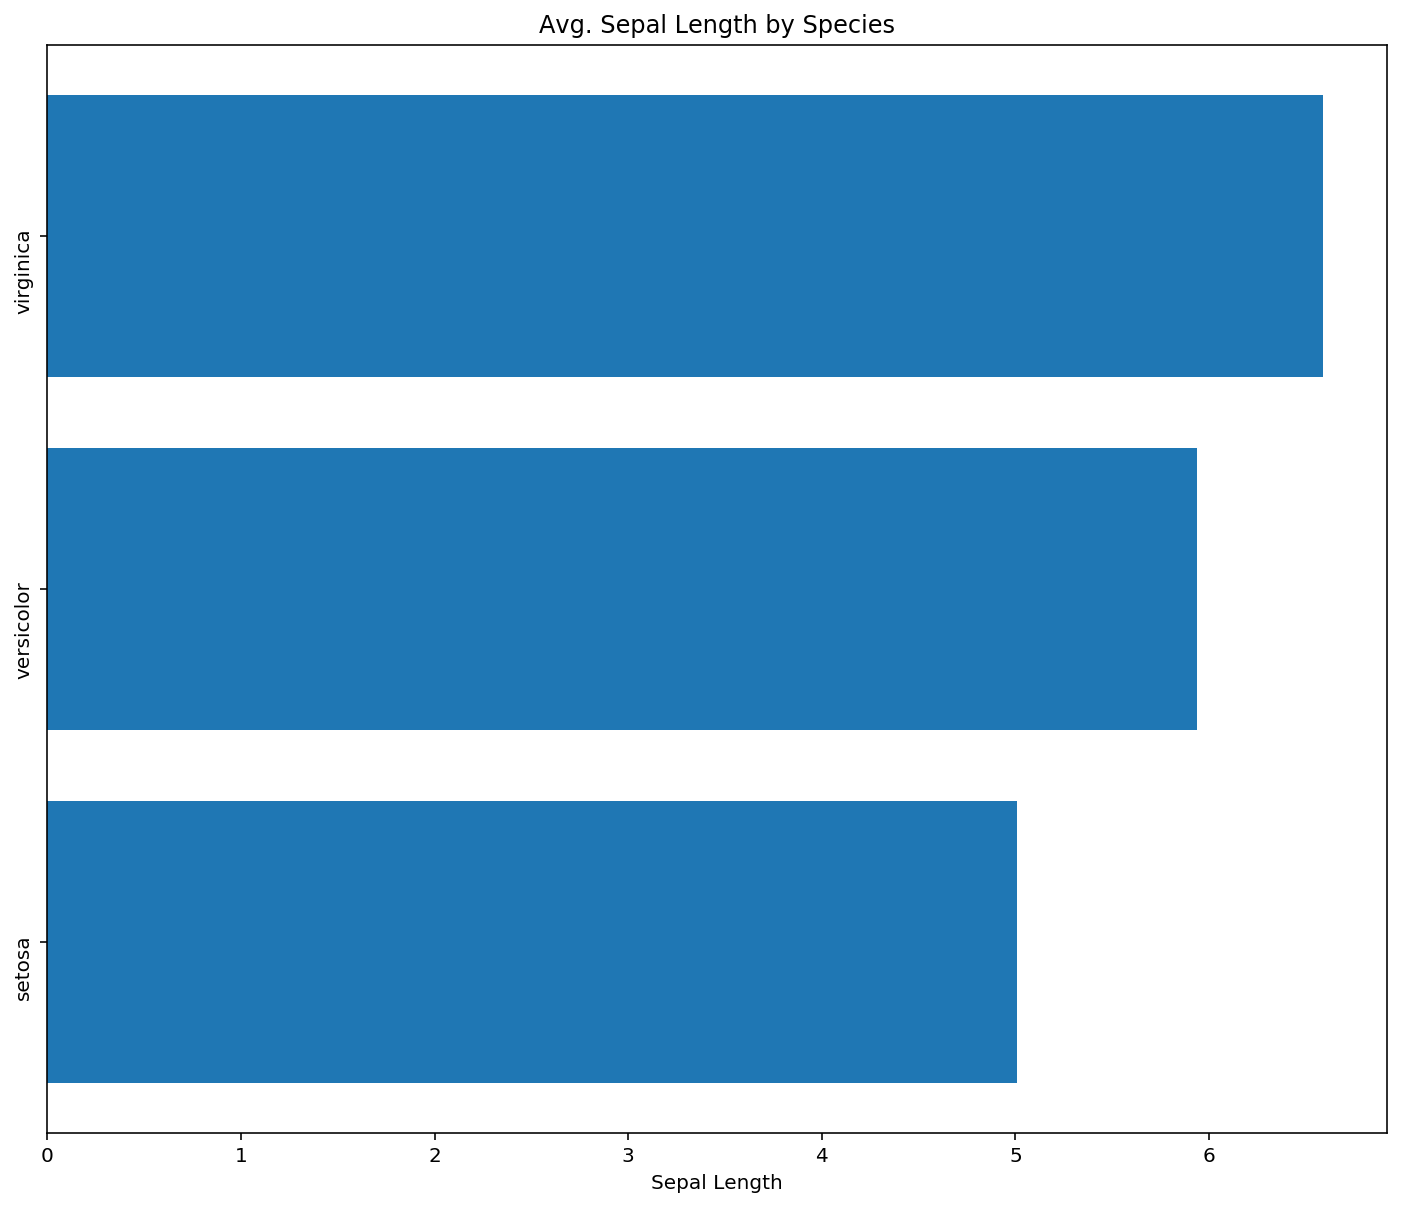

In [10]:
plt.figure(figsize = (12,10))
plt.barh(grouped_data.index, grouped_data['sepal_length'])
plt.xlabel('Sepal Length')
plt.title('Avg. Sepal Length by Species')
# Rotate the plot labels
plt.yticks(rotation = 90)
plt.show()

This works for 1 thing, but that's often not what we want. Suppose we have multiple things to show for each species; we've got a number of ways to do it. 

### Multiple Overlayed bars

Simplest way; bars will just be plotted on top of one another. There's no point in doing this completely opaquely, as you can't see everything. So I'll make them translucent:

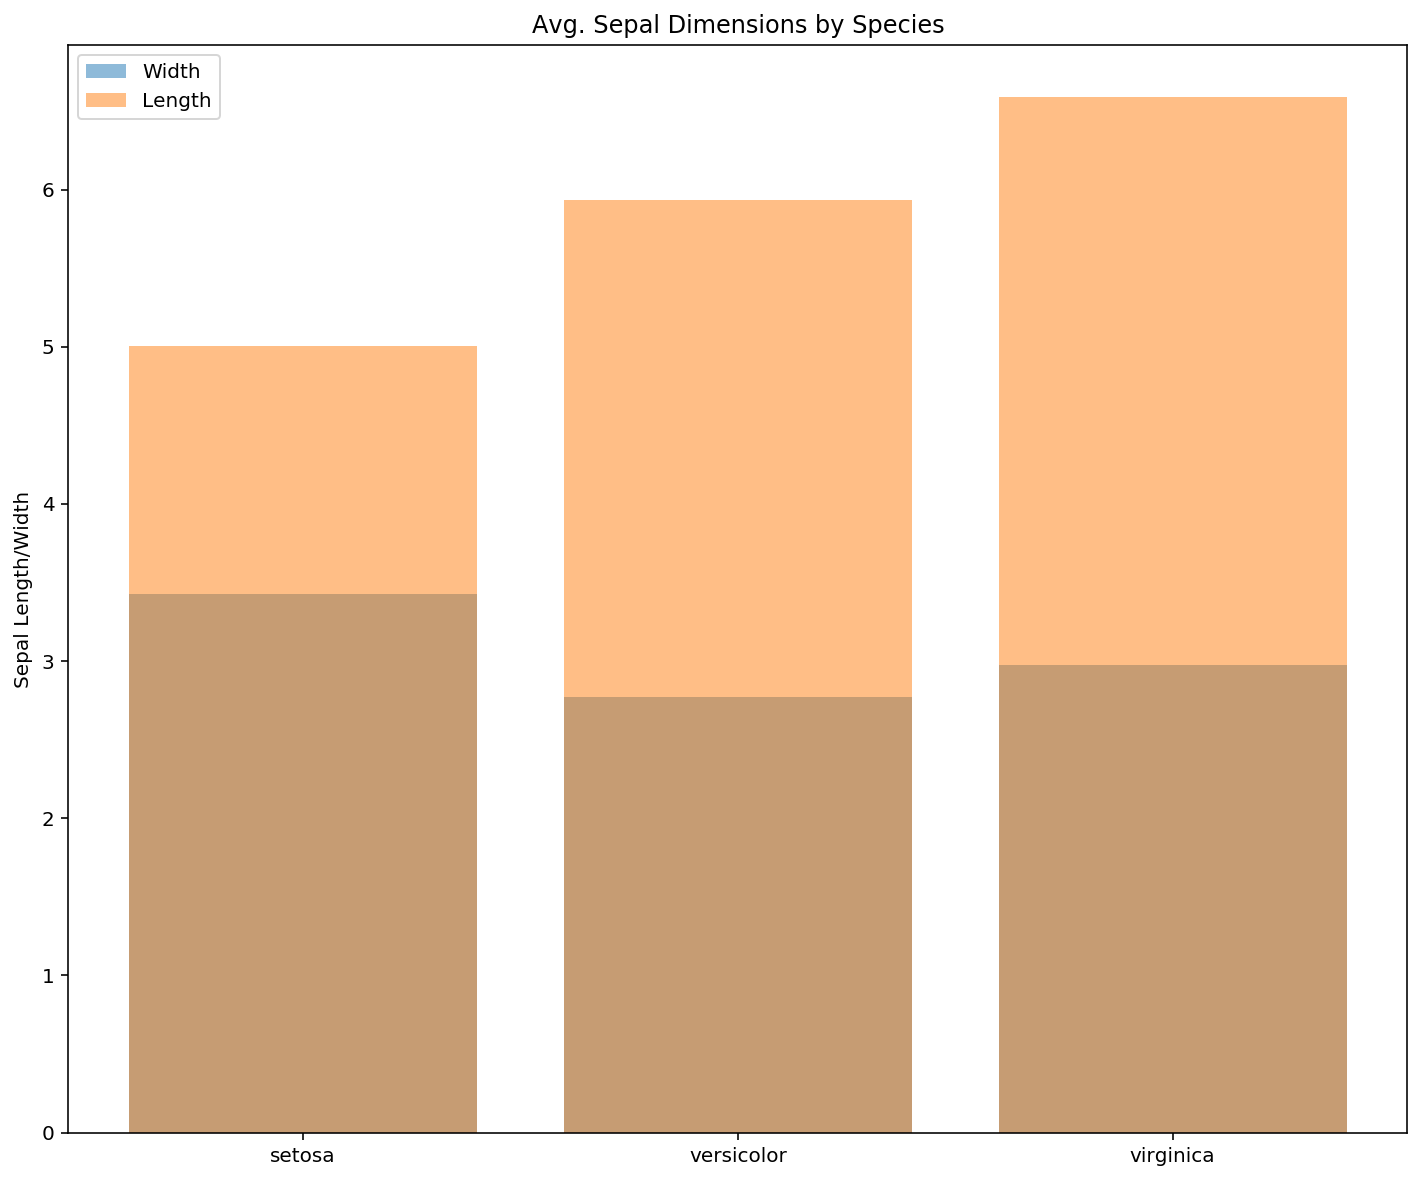

In [11]:
plt.figure(figsize = (12,10))
plt.bar(grouped_data.index, grouped_data['sepal_width'], alpha = 0.5)
plt.bar(grouped_data.index, grouped_data['sepal_length'], alpha = 0.5)
plt.legend(['Width', 'Length'])
plt.ylabel('Sepal Length/Width')
plt.title('Avg. Sepal Dimensions by Species')
plt.show()

And the horizontal version:

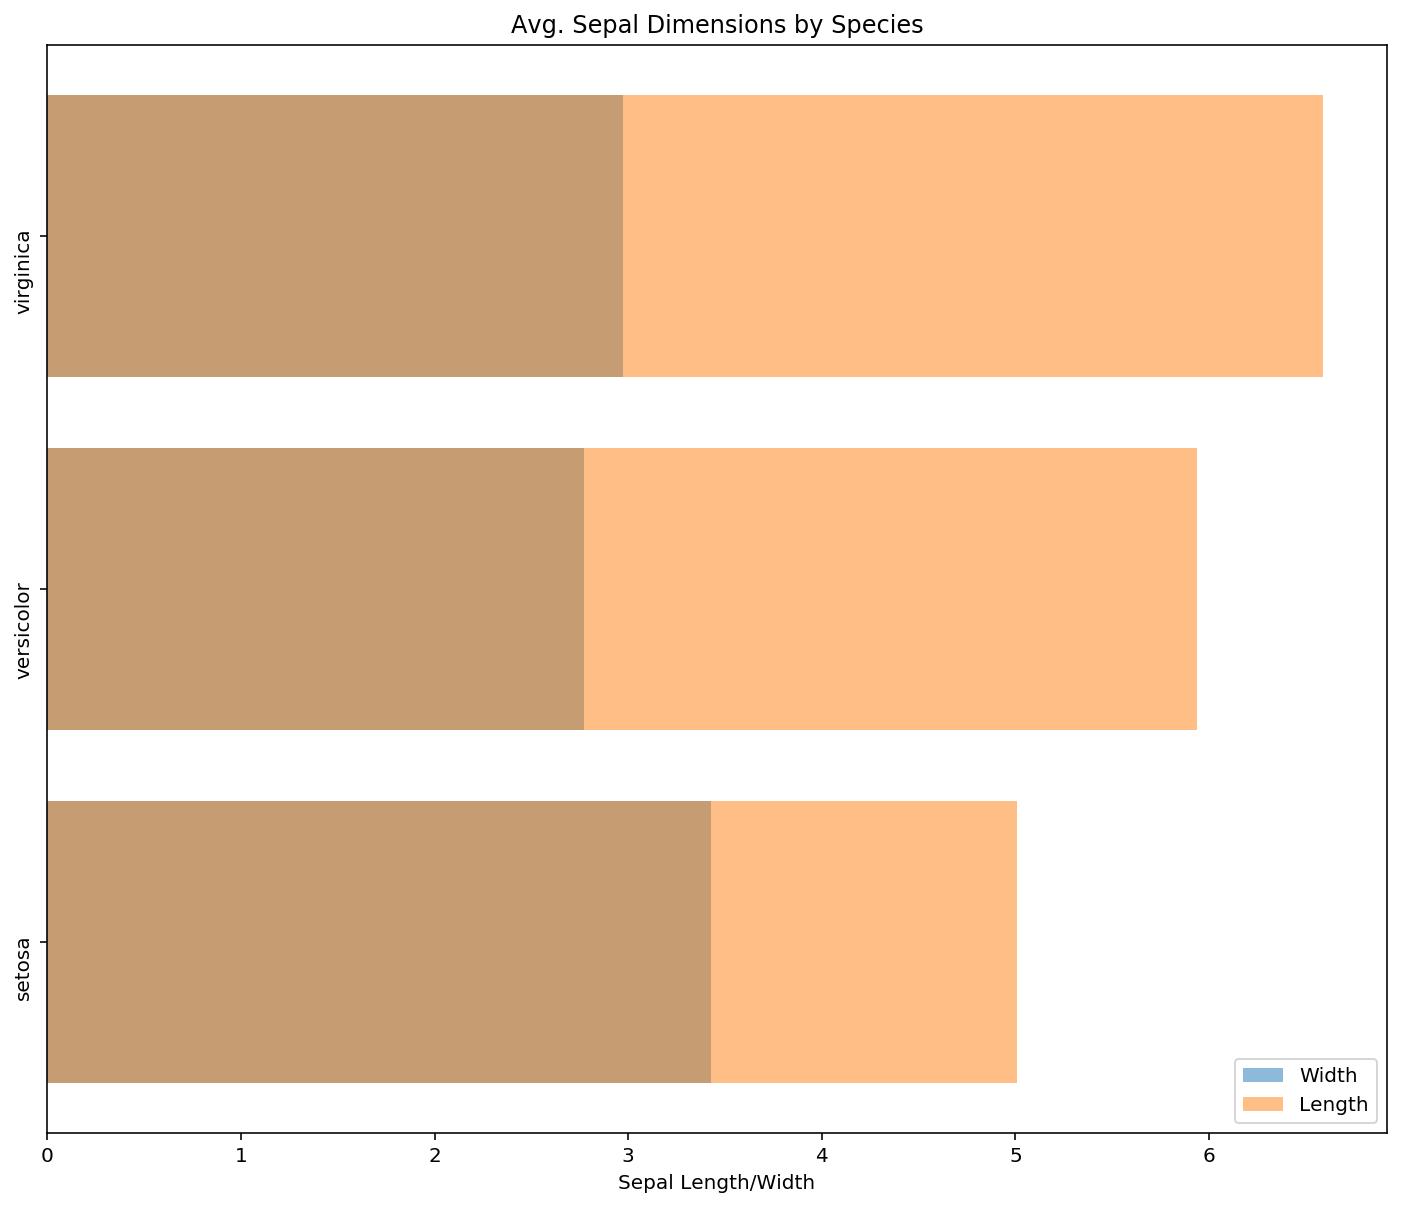

In [12]:
plt.figure(figsize = (12,10))
plt.barh(grouped_data.index, grouped_data['sepal_width'], alpha = 0.5)
plt.barh(grouped_data.index, grouped_data['sepal_length'], alpha = 0.5)
plt.legend(['Width', 'Length'])
plt.xlabel('Sepal Length/Width')
# Rotate the plot labels
plt.yticks(rotation = 90)
plt.title('Avg. Sepal Dimensions by Species')
plt.show()

The problem here is pretty clear: even if I were to attach a legend, these would be a bit weird-looking. You can at least see that the width doesn't correlate with length, but that's about it. 

### Multiple Stacked Bars

The easiest way to deal with this is probably by stacking, via the key word "bottom":


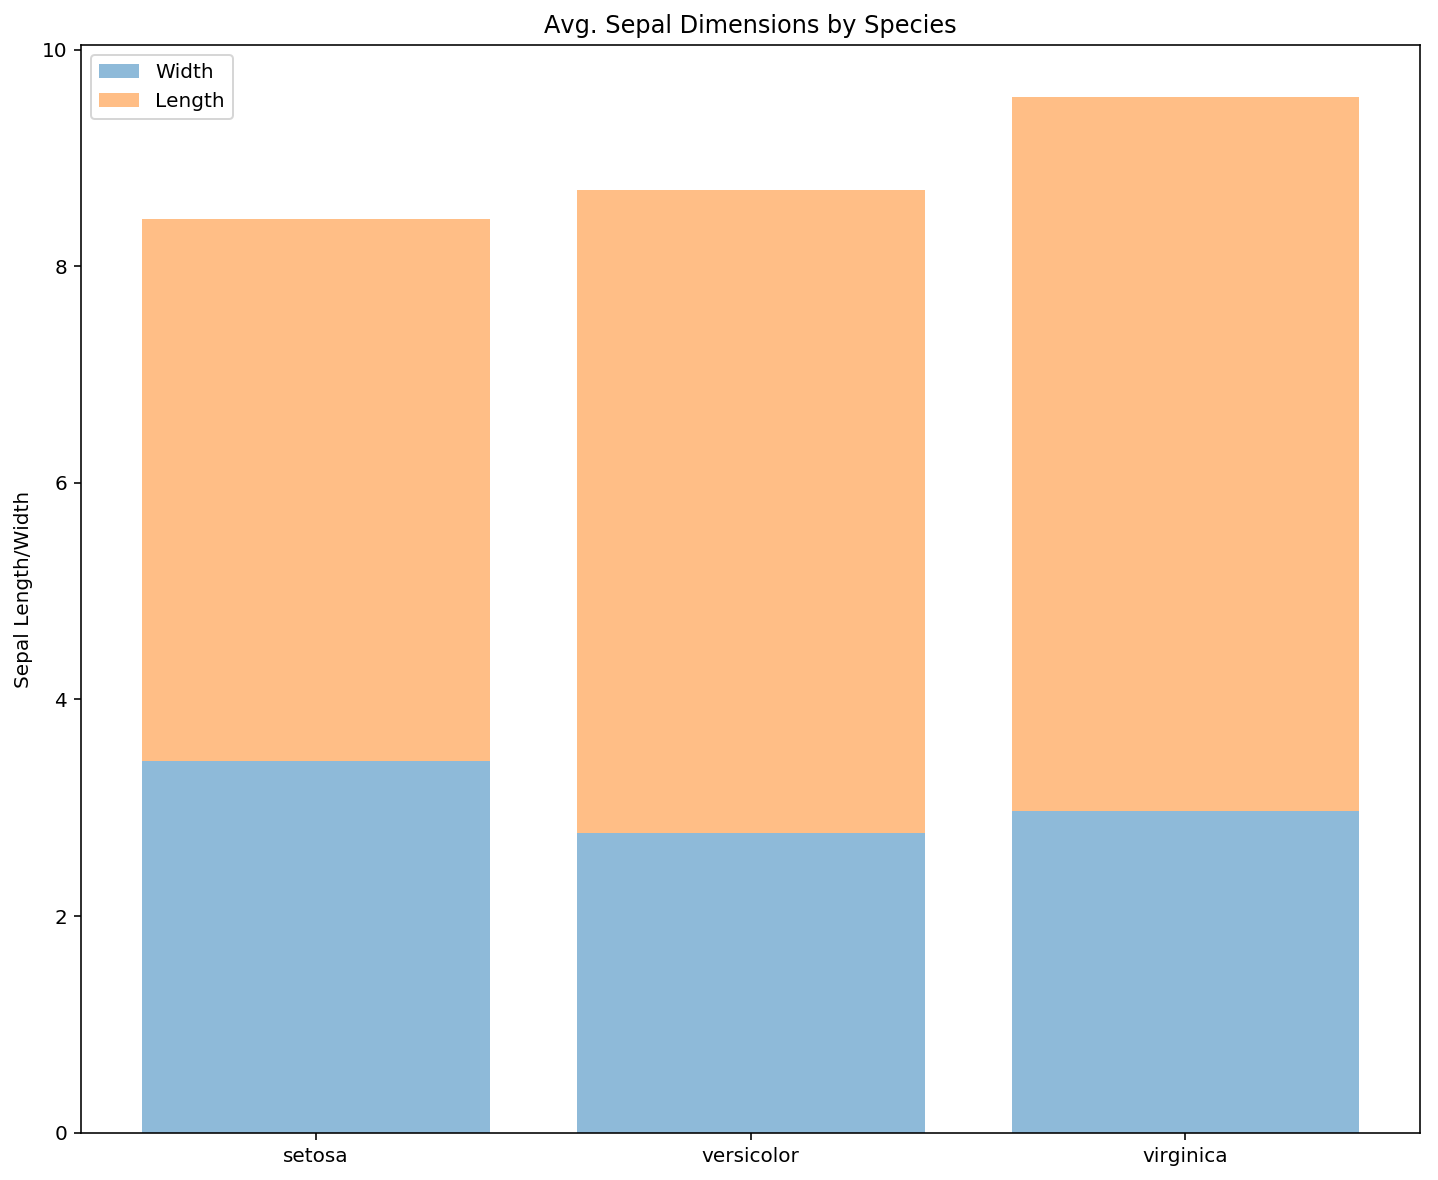

In [13]:
plt.figure(figsize = (12,10))
plt.bar(grouped_data.index, grouped_data['sepal_width'], alpha = 0.5)
plt.bar(grouped_data.index, grouped_data['sepal_length'], 
        bottom = grouped_data['sepal_width'], alpha = 0.5)
plt.legend(['Width', 'Length'])
plt.ylabel('Sepal Length/Width')
plt.title('Avg. Sepal Dimensions by Species')
plt.show()

Horizontal uses the "left" argument instead:

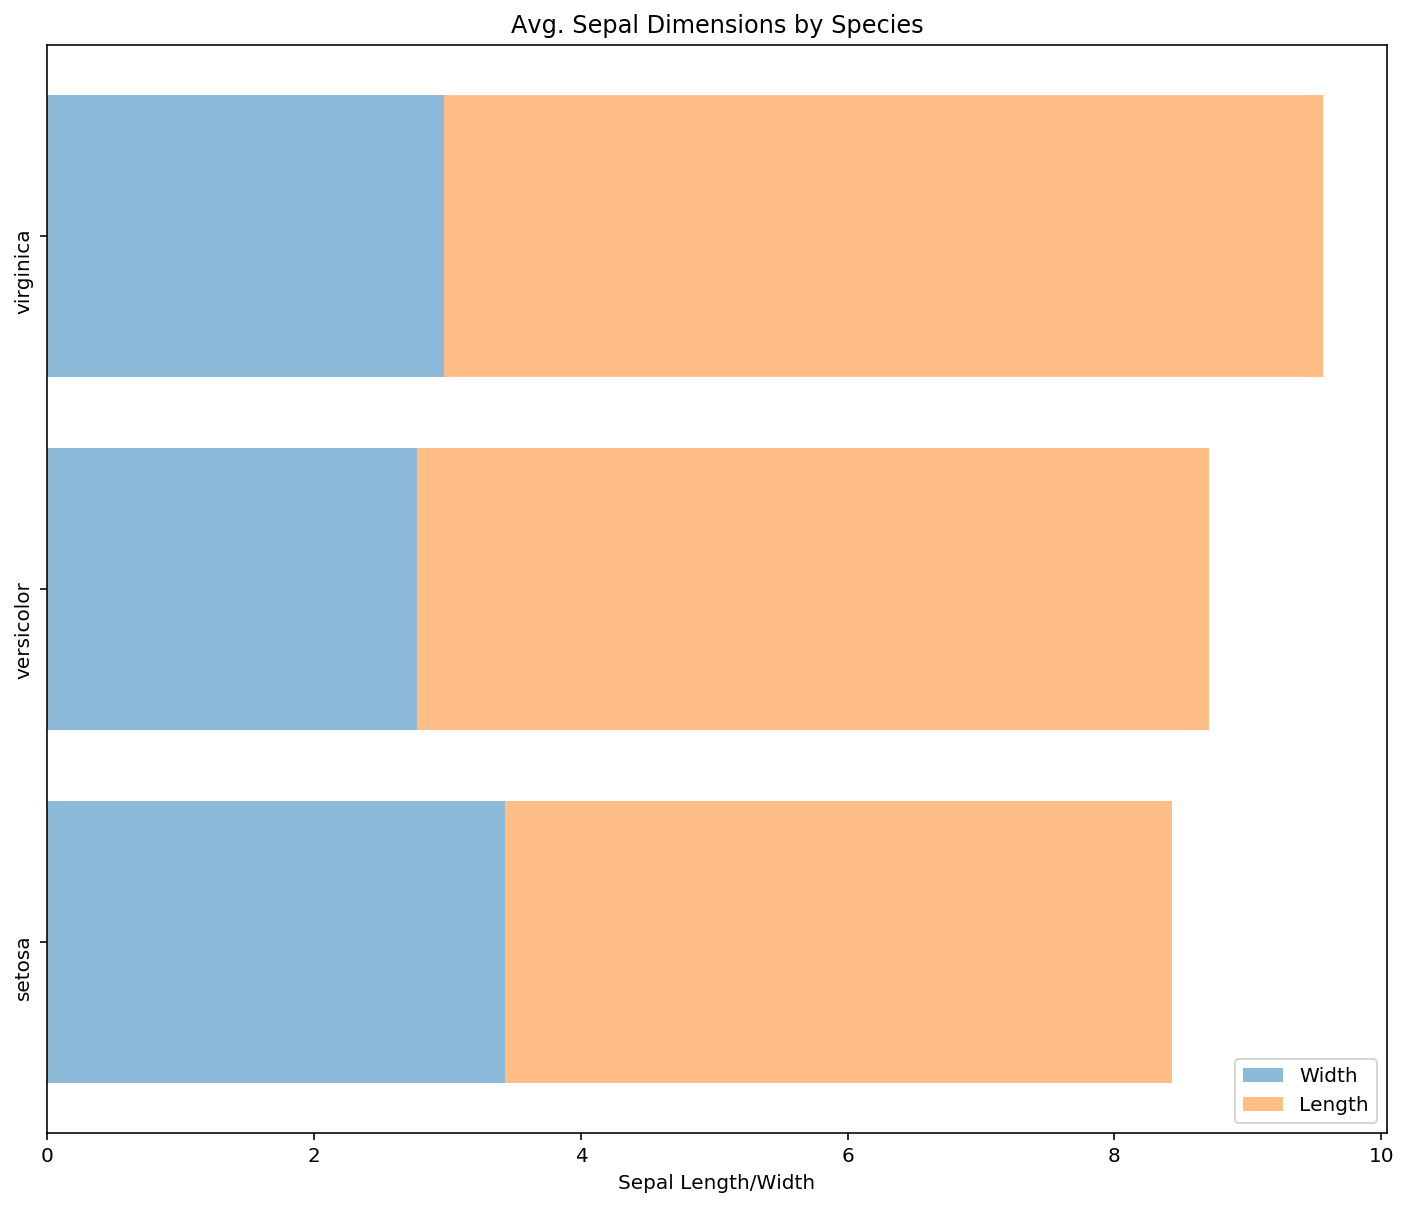

In [14]:
plt.figure(figsize = (12,10))
plt.barh(grouped_data.index, grouped_data['sepal_width'], alpha = 0.5)
plt.barh(grouped_data.index, grouped_data['sepal_length'], 
        left = grouped_data['sepal_width'], alpha = 0.5)
plt.legend(['Width', 'Length'])
plt.xlabel('Sepal Length/Width')
# Rotate the plot labels
plt.yticks(rotation = 90)
plt.title('Avg. Sepal Dimensions by Species')
plt.show()

This is better in that we can see the sum easier, but there's still some weirdness. My favorite way around it is by putting things next to each other:

### Multiple Grouped Bars

A little more involved; need to create parameters for bar width and index:

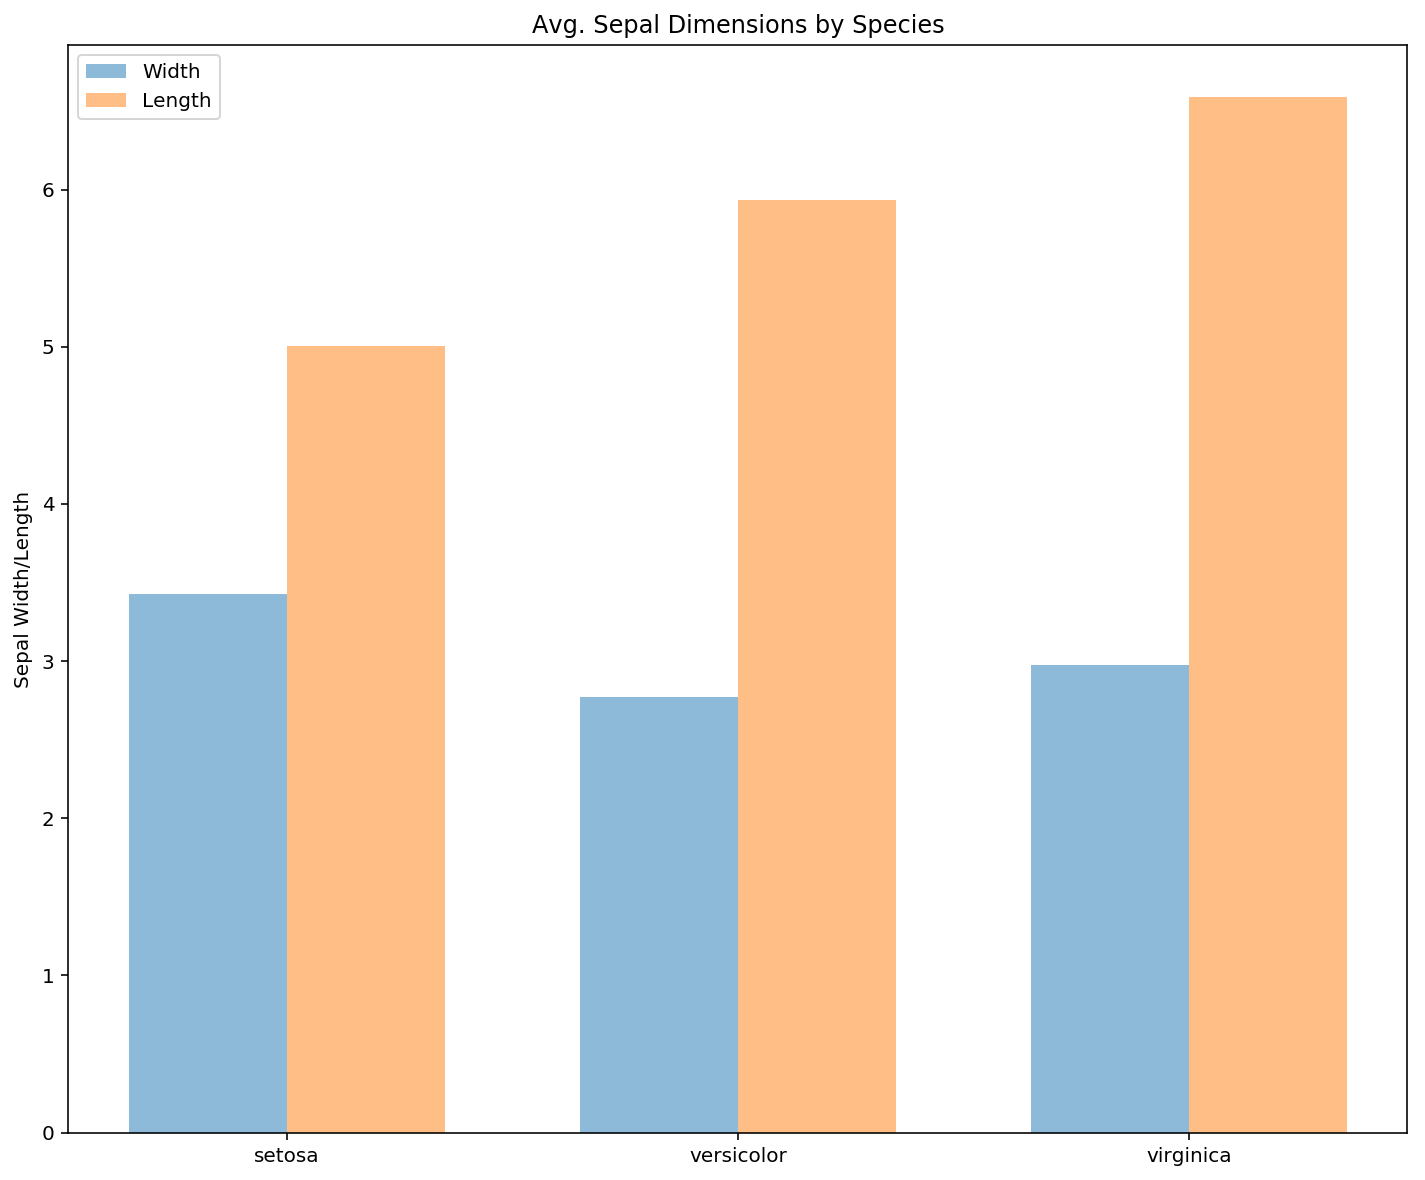

In [15]:
# Set index for position and bar width
index = np.arange(len(grouped_data.index))
bar_width = 0.35

fig, ax = plt.subplots(figsize=(12,10))

ax.bar(index, color = 'C0', alpha = 0.5,
       height = grouped_data['sepal_width'], 
       width = bar_width, label = 'Width')
ax.bar(index + bar_width, color = 'C1', alpha = 0.5,
       height = grouped_data['sepal_length'], 
       width = bar_width, label = 'Length')

# Set the labels
ax.set_xticks(index + bar_width/2)
ax.set_xticklabels(grouped_data.index)
ax.legend()
plt.title('Avg. Sepal Dimensions by Species')
plt.ylabel('Sepal Width/Length')
plt.show()

And doing it for horizontal is the same, just different axis:

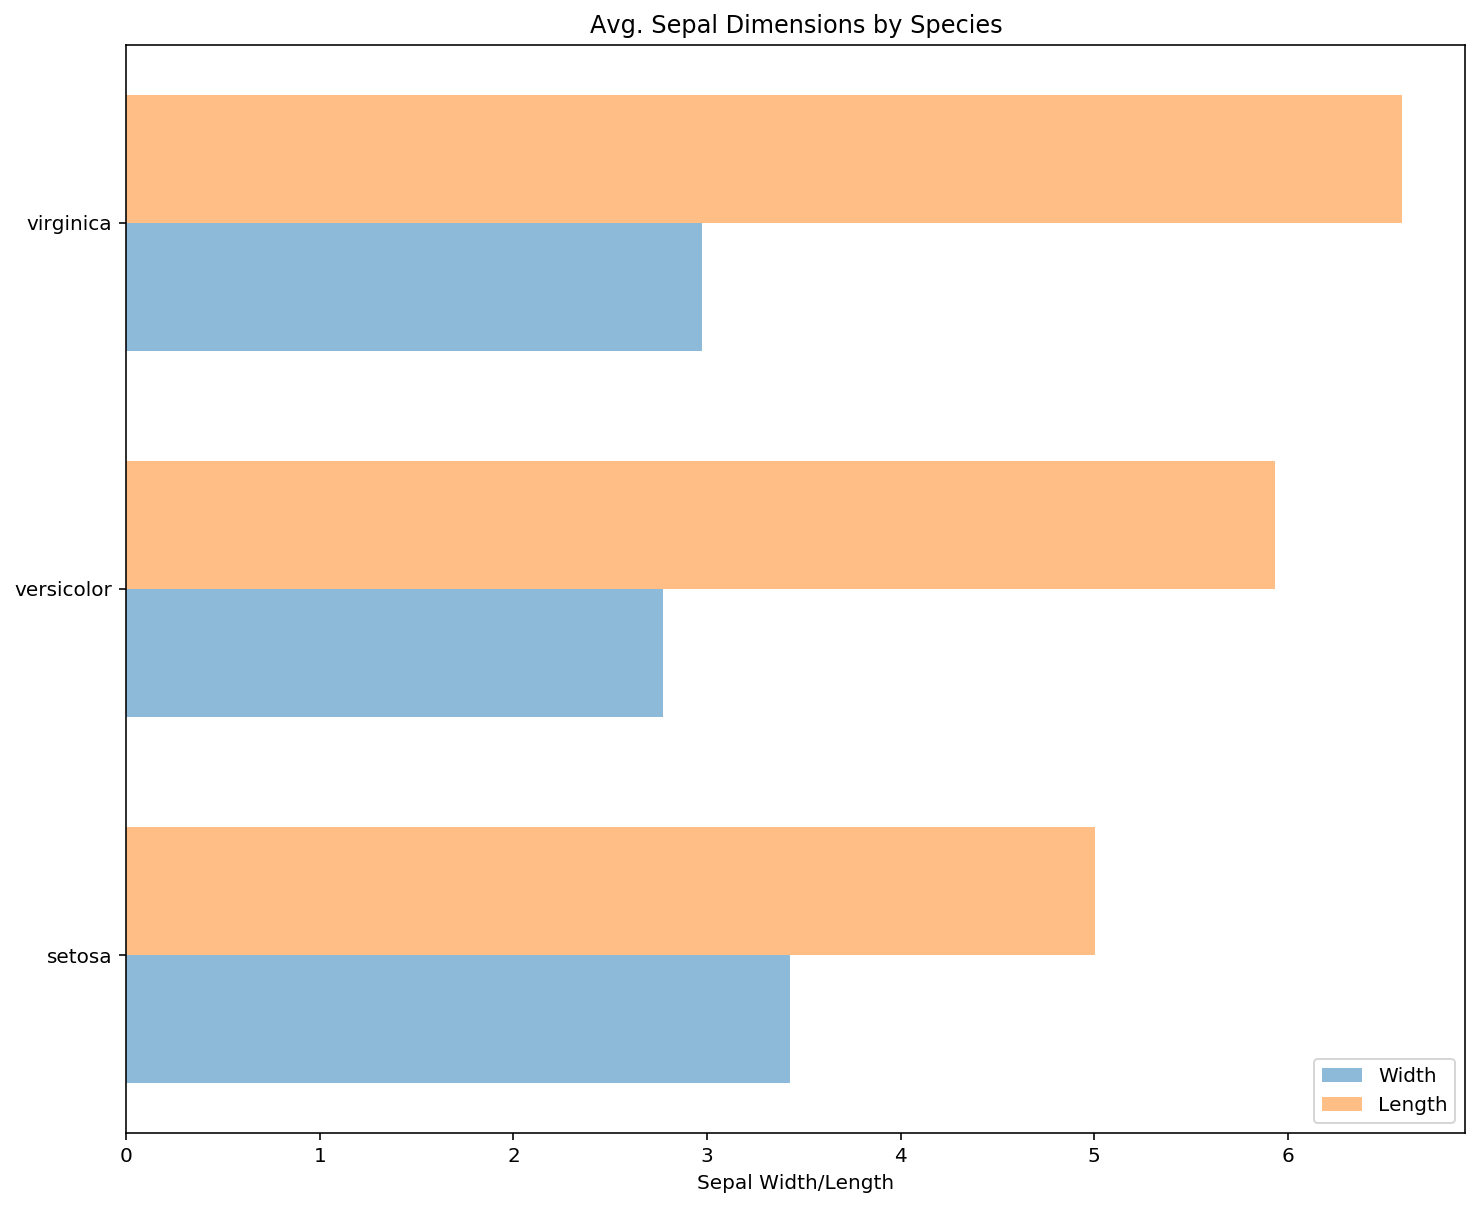

In [16]:
# Set index for position and bar width
index = np.arange(len(grouped_data.index))
bar_height = 0.35

fig, ax = plt.subplots(figsize=(12,10))

ax.barh(index, color = 'C0', alpha = 0.5,
       width = grouped_data['sepal_width'], 
       height = bar_height, label = 'Width')
ax.barh(index + bar_height, color = 'C1', alpha = 0.5,
       width = grouped_data['sepal_length'], 
       height = bar_height, label = 'Length')

# Set the labels
ax.set_yticks(index + bar_height/2)
ax.set_yticklabels(grouped_data.index)
ax.legend()
plt.title('Avg. Sepal Dimensions by Species')
plt.xlabel('Sepal Width/Length')
plt.show()

That's basically it for bar plots

## Scatter Plots

These are for plotting 2 variables against one another; it may be the single area where Seaborn excels most. After all, Seaborn can easily do both the points AND the regression line. But I'll attempt to do all of this stuff anyway, following this progression:

* Plain scatter plot
* Manipulating marker size
* Univariate scatter with fit line
* Multivariate scatter plots
* Multivariate scatter plots with fit lines
* Error bar plots

### Normal Scatter Plot

Super straightforward; I'll do it for petal dimensions to change it up:

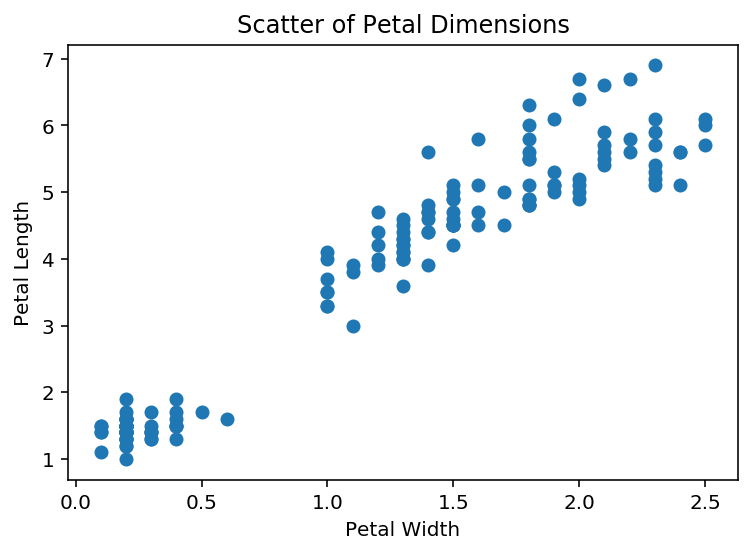

In [17]:
# Simple scatter plot
plt.scatter(iris_df['petal_width'],
            iris_df['petal_length'])
plt.xlabel('Petal Width')
plt.ylabel('Petal Length')
plt.title('Scatter of Petal Dimensions')
plt.show()

It can also be helpful sometimes to change marker size by the points themselves; here, I'll just scale by size, so it'll get bigger as the widths/lengths get larger

### Scatter Plot Marker Size Scaling

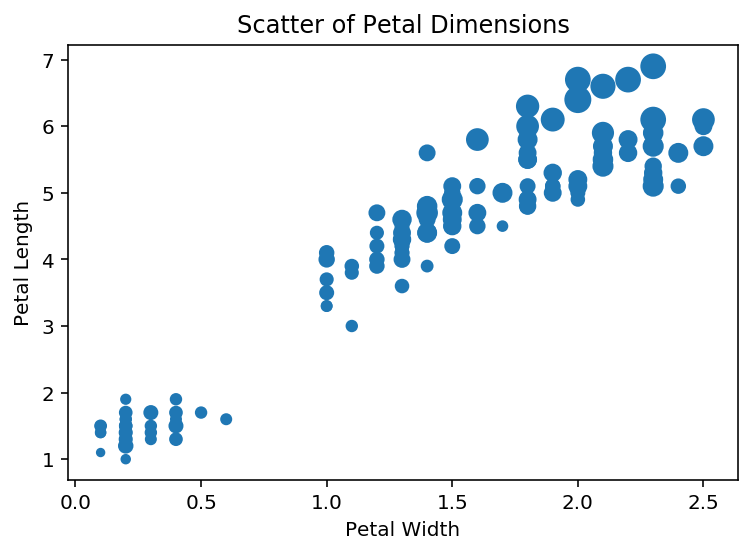

In [18]:
# Simple scatter plot
plt.scatter(iris_df['petal_width'],
            iris_df['petal_length'],
            s = 0.04 * iris_df['sepal_length'] ** 4) # Scale by length^4 and scale down by a scalar
plt.xlabel('Petal Width')
plt.ylabel('Petal Length')
plt.title('Scatter of Petal Dimensions')
plt.show()

### Univariate Scatter w/ Fit Line

Now I can do a regression line and add it; this will require some line plot functionality, but that's just peachy! 

First, get the line as a function:

In [19]:
# Fit the stat model
fit_line = np.polyfit(iris_df['petal_width'],iris_df['petal_length'],1)

# Get a function that will estimate x given those parameters
fit_fxn = np.poly1d(fit_line)

Now we can just add that to the plot to accomplish what we want. We'll also plot the line:

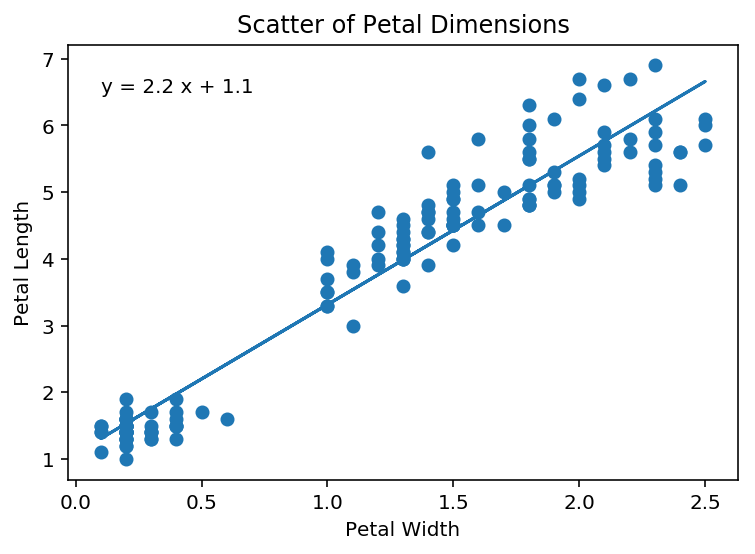

In [20]:
# Simple scatter plot
plt.scatter(iris_df['petal_width'],
            iris_df['petal_length'])
plt.plot(iris_df['petal_width'], 
         fit_fxn(iris_df['petal_width']))
plt.xlabel('Petal Width')
plt.ylabel('Petal Length')
plt.title('Scatter of Petal Dimensions')

# Add the equation
plt.text(0.1, 6.5, 
         'y = {:0.1f} x + {:0.1f}'.format(fit_line[0], fit_line[1])
         )
plt.show()

#### Add the R^2

The only problem here is that we don't have a measure of "goodness" of fit. To do that, we'll need to use the stats package in Scipy:

In [21]:
# Get the fit parameters and make a fit function again
slope, intercept, r_value, p_value, std_err = linregress(iris_df['petal_width'],iris_df['petal_length'])
fit_fxn = np.poly1d(np.array([slope, intercept]))

Now do it again, but add the R^2

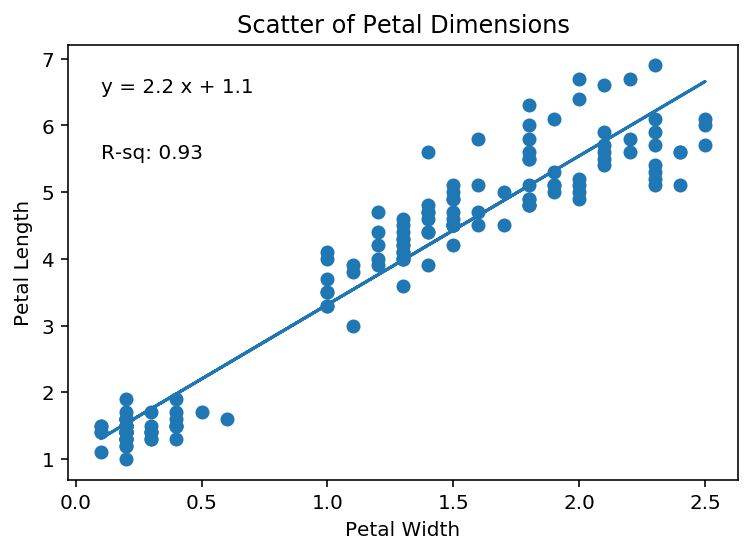

In [22]:
# Simple scatter plot
plt.scatter(iris_df['petal_width'],
            iris_df['petal_length'])
plt.plot(iris_df['petal_width'], 
         fit_fxn(iris_df['petal_width']))
plt.xlabel('Petal Width')
plt.ylabel('Petal Length')
plt.title('Scatter of Petal Dimensions')

# Add the equation
plt.text(0.1, 6.5, 
         'y = {:0.1f} x + {:0.1f}'.format(fit_line[0], fit_line[1])
         )
# Add the R^2
plt.text(0.1, 5.5, 
         'R-sq: {:0.2f}'.format(r_value ** 2))
plt.show()

Just for usefulness, I kind want to wrap the lighter version into a function, so I'll do that here. Keep in mind that this won't actually label or show the plot

### Function for Doing Univariate Regression (and Demo)

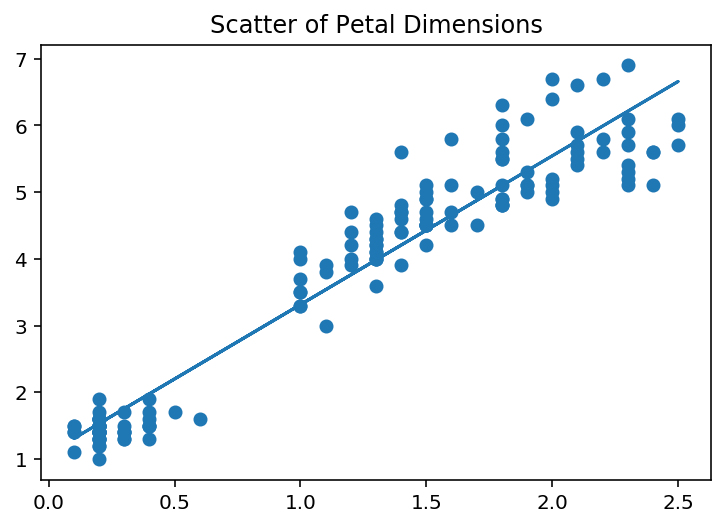

In [23]:
def scatterAndRegress(x, y):
    '''Make a scatter plot with regression line for 1 series'''
    
    # Get the line equation and make a function
    fit_line = np.polyfit(x,y,1)
    fit_fxn = np.poly1d(fit_line)
    
    # Make the simple scatter plot
    plt.scatter(x, y)
    plt.plot(x, fit_fxn(x))
    
# Demonstrate
scatterAndRegress(iris_df['petal_width'],iris_df['petal_length'])
plt.title('Scatter of Petal Dimensions')
plt.show()

Now I'll move on to multiple; this function will be useful shortly

### Multiple Scatter Plots

Sans the regression lines, it's pretty much the same; I'm going to separate out the data first by species

In [24]:
# Separate the species
virginica = iris_df[iris_df.species == 'virginica']
versicolor = iris_df[iris_df.species == 'versicolor']
setosa = iris_df[iris_df.species == 'setosa']

Plotting:

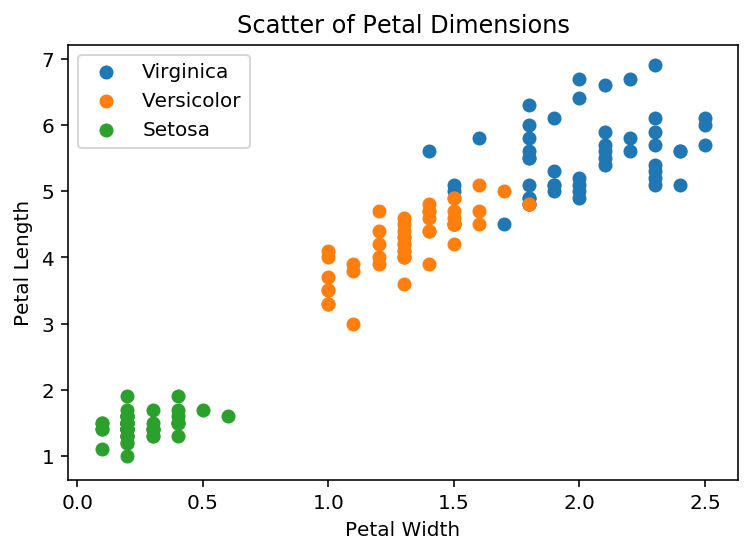

In [25]:
# Plot each of them
plt.scatter(virginica['petal_width'],
            virginica['petal_length'])
plt.scatter(versicolor['petal_width'],
            versicolor['petal_length'])
plt.scatter(setosa['petal_width'],
            setosa['petal_length'])

# Labeling
plt.legend(['Virginica', 'Versicolor', 'Setosa'])
plt.xlabel('Petal Width')
plt.ylabel('Petal Length')
plt.title('Scatter of Petal Dimensions')
plt.show()

Hooray! That actually looks pretty good; now to add the lines:

### Multivariate Regression

I'm not going to bother adding equations. If I wanted to, I clearly could; it would be a pain though. Just do it 3 times using the function:

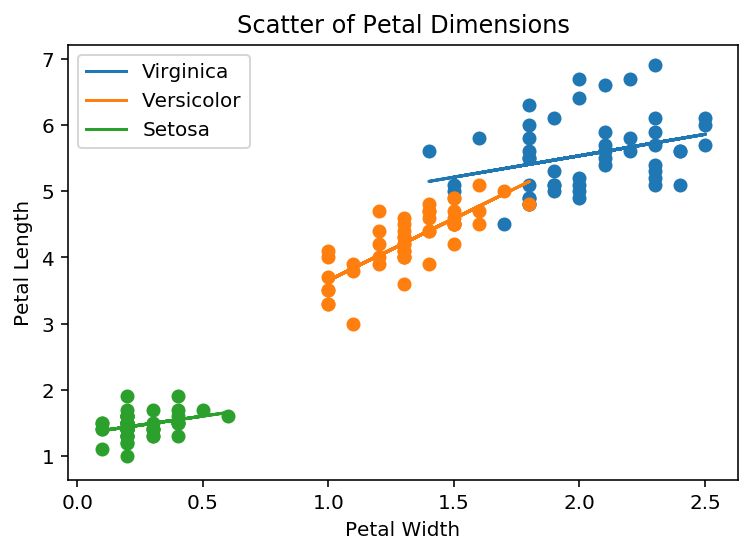

In [26]:
# Do all 3 in a row
scatterAndRegress(virginica['petal_width'],virginica['petal_length'])
scatterAndRegress(versicolor['petal_width'],versicolor['petal_length'])
scatterAndRegress(setosa['petal_width'],setosa['petal_length'])

# Label and whatnot
plt.legend(['Virginica', 'Versicolor', 'Setosa'])
plt.xlabel('Petal Width')
plt.ylabel('Petal Length')
plt.title('Scatter of Petal Dimensions')
plt.show()

One more major thing to do: scatter with error bars!

### Error Bar Plot

I need to generate some errors; let's make some random noise!


In [27]:
# Make some noise
petal_noise = np.random.rand(len(iris_df), 1)/5

Okay, so now make error bars using this:

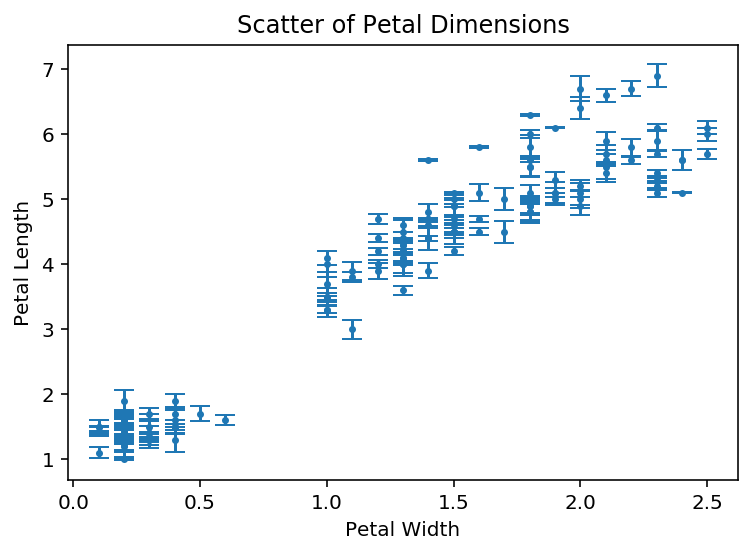

In [28]:
plt.errorbar(iris_df['petal_width'],
             iris_df['petal_length'],
             yerr = petal_noise, 
             marker = '.', linestyle = 'None',
             markersize = 5, capsize = 5)
plt.xlabel('Petal Width')
plt.ylabel('Petal Length')
plt.title('Scatter of Petal Dimensions')
plt.show()

That's kind of all I want to do for now; I could alter alpha for transparency or something crazy like that, but it's not going to be any better. 

Next up is something similar: line plots

## Line Plots

This is often for a trend over time, so I'll pull in a different dataset here: the flights data!

In [29]:
# Blah
flights = sns.load_dataset("flights")
print(flights.head())
flights.info()

   year     month  passengers
0  1949   January         112
1  1949  February         118
2  1949     March         132
3  1949     April         129
4  1949       May         121
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
year          144 non-null int64
month         144 non-null category
passengers    144 non-null int64
dtypes: category(1), int64(2)
memory usage: 2.9 KB


The data here are less exciting, but I do need to actually put these together into a date. Time for some fancy-schmancy munging:

In [30]:
# Add a dummy column for day
flights['day'] = 1

# Turn to a date-time
flights['Date'] = flights['year'].astype(str) + '/' + flights['month'].astype(str) + '/' + flights['day'].astype(str)
flights['Date'] = pd.to_datetime(flights['Date'], format = '%Y/%B/%d')

I think this worked:

In [31]:
print(flights.head())
flights.info()

   year     month  passengers  day       Date
0  1949   January         112    1 1949-01-01
1  1949  February         118    1 1949-02-01
2  1949     March         132    1 1949-03-01
3  1949     April         129    1 1949-04-01
4  1949       May         121    1 1949-05-01
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 5 columns):
year          144 non-null int64
month         144 non-null category
passengers    144 non-null int64
day           144 non-null int64
Date          144 non-null datetime64[ns]
dtypes: category(1), datetime64[ns](1), int64(3)
memory usage: 5.1 KB


Alright, so the line plots I want to make are pretty simple:

* Single line plot (plain)
* Single line plot (markers)
* Multiple line plot (plain)
* Multiple line plot (markers)

That's about it...unless I think of something later

### Single Line Plot (Plain)

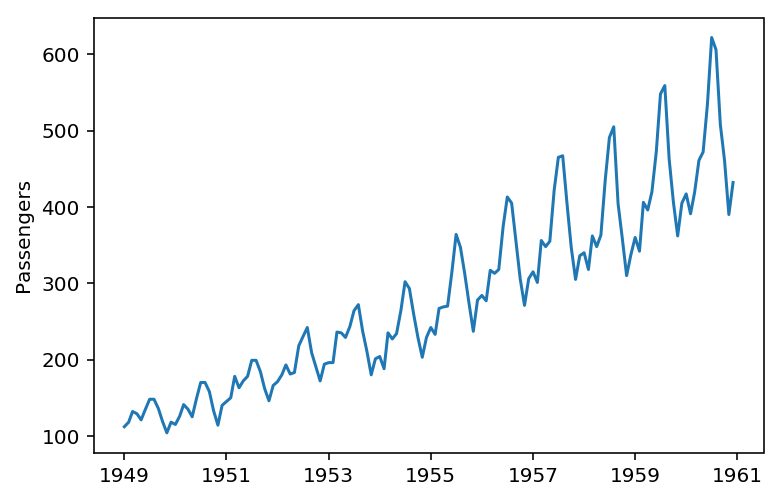

In [32]:
# Make line plot on single thing
plt.plot(flights['Date'],
         flights['passengers'])
plt.ylabel('Passengers')
plt.show()

Adding markers is as easy as adding another argument; while I'm at it, I'll make the line dashed

### Single Line Plot w/ Markers

For fun, let's make the markers diamonds:

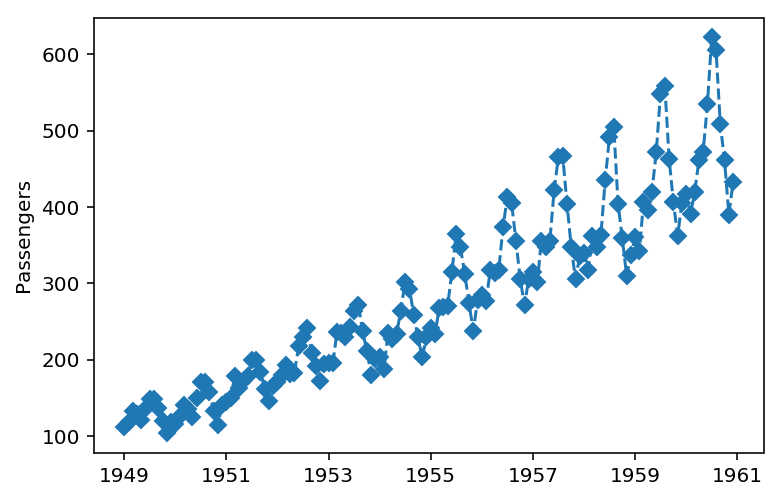

In [33]:
# Make line plot on single thing
plt.plot(flights['Date'],
         flights['passengers'],
         marker = 'D',
         linestyle = '--')
plt.ylabel('Passengers')
plt.show()

That's the single series; let's move on to the multiple series. Keep in mind that I only have 1 data series; I'll fix this by adding some random noise to the passenger series.

### Multiple Line Plot (Plain)

First, the noise to make a new column:

In [34]:
# Make some noise
flights['Noise'] = flights['passengers'] + np.random.randint(-200,200, len(flights))

Now plot it too

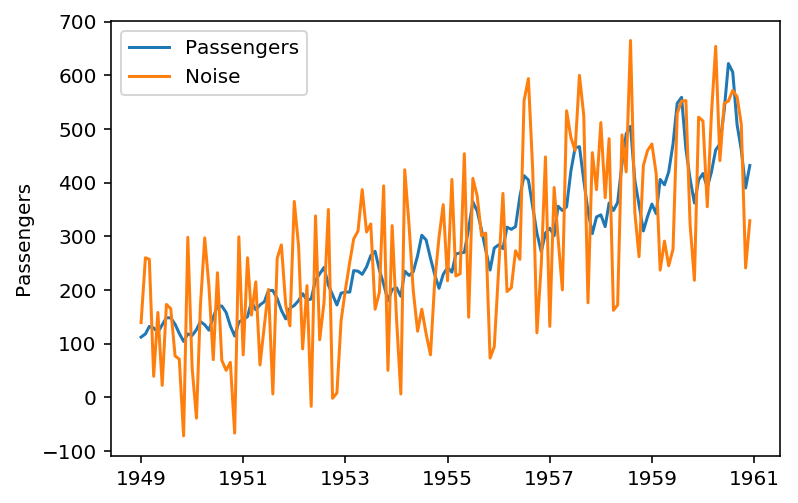

In [35]:
# Make line plot on single thing
plt.plot(flights['Date'],
         flights['passengers'])
plt.plot(flights['Date'],
         flights['Noise'])
plt.legend(['Passengers', 'Noise'])
plt.ylabel('Passengers')
plt.show()

That was kind of fun! Now let's add the markers; this time, I'll add different ones to each!

### Multiple Line Plot w/ Markers

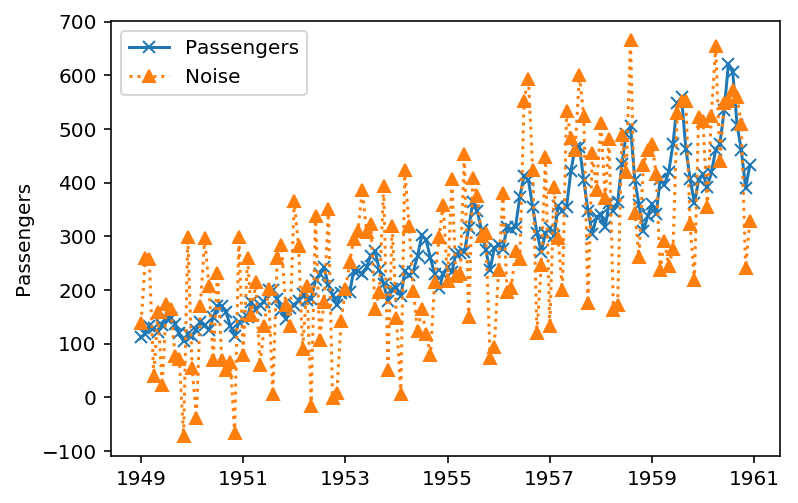

In [36]:
# Make line plot on single thing
plt.plot(flights['Date'],
         flights['passengers'],
         marker = 'x')
plt.plot(flights['Date'],
         flights['Noise'],
         linestyle = ':', # Dotted line
         marker = '^') # Upper triangle
plt.legend(['Passengers', 'Noise'])
plt.ylabel('Passengers')
plt.show()

I think that's all for line plots. Now for some fun with color: heat maps!

## Heat Maps

The easiest thing to do here is return to the iris data. I'll be using the correlation data. I think there's a couple categories to cover here:

* Regular heat map
* Logarithmic heat map

We'll see how the latter turns out. Neither is hard.

### Regular heatmap

As stated, I'll be using the correlations, but that's easy enough. Into it then!

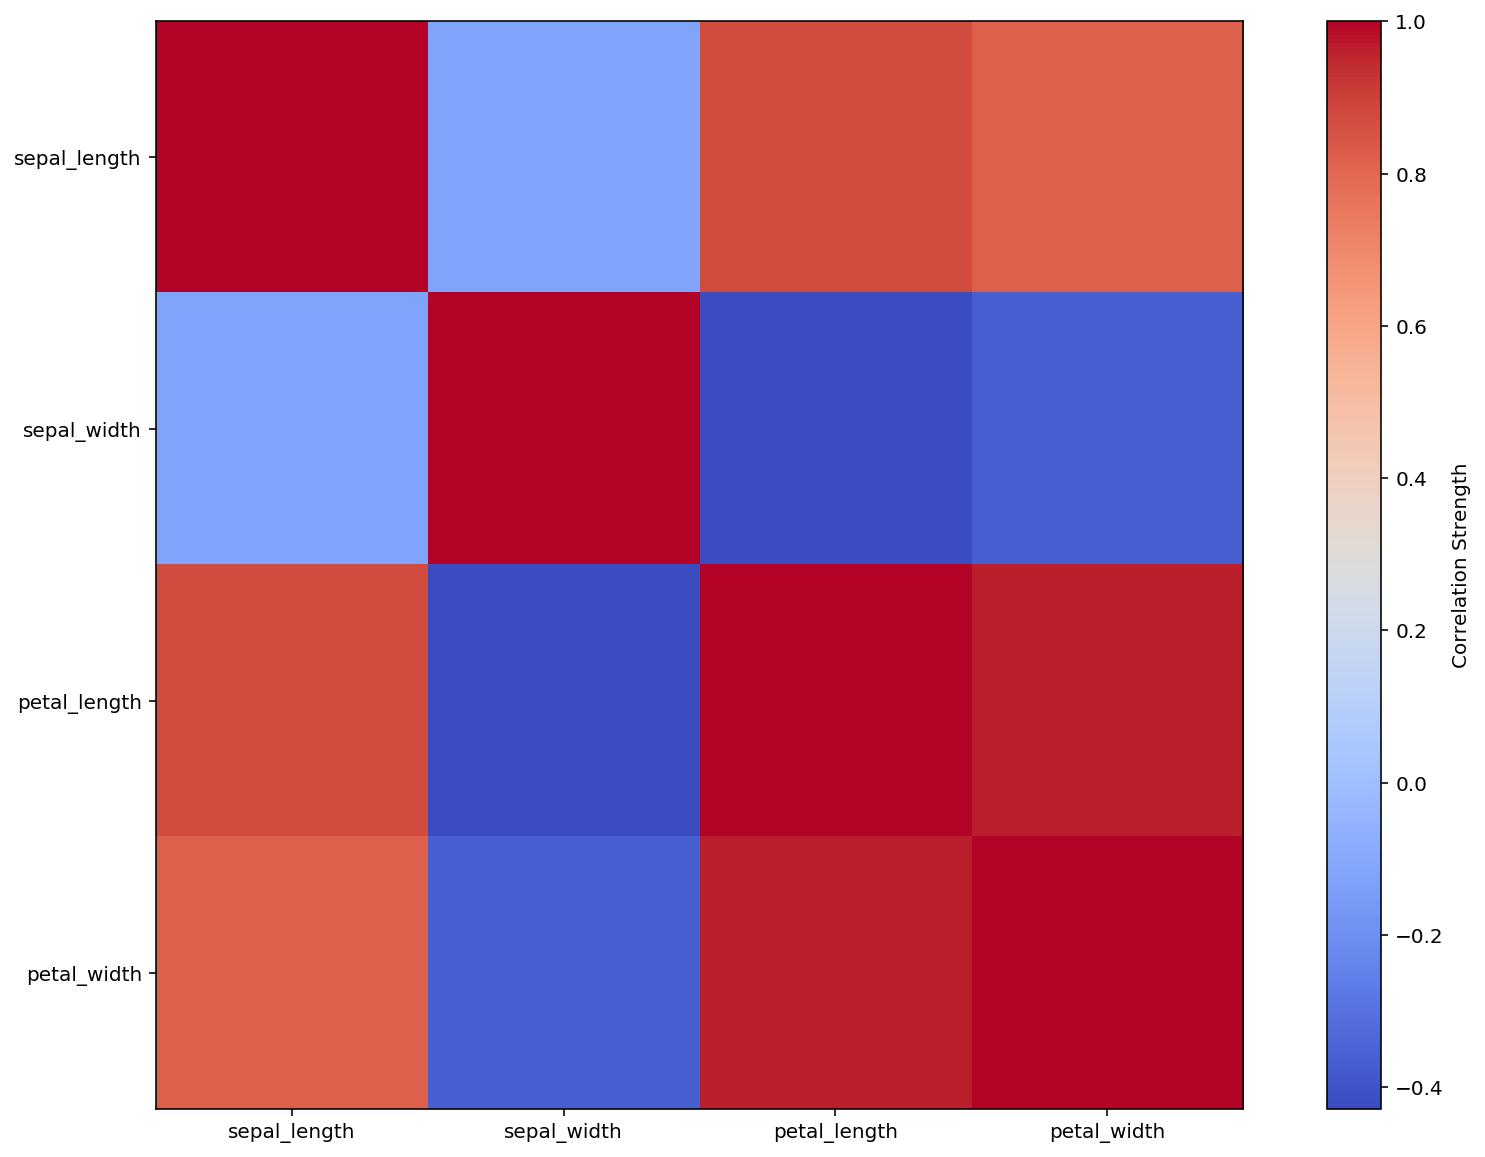

In [37]:
f, ax = plt.subplots(figsize = (15,10))
cax = ax.imshow(iris_df.corr(),
                cmap = 'coolwarm'
               )

# Set the labels
ax.set_xticks(range(4))
ax.set_xticklabels(iris_df.columns[0:4])
ax.set_yticks(range(4))
ax.set_yticklabels(iris_df.columns[0:4])

# Alter the colorbar by adding a label
cbar = f.colorbar(cax)
cbar.set_label('Correlation Strength')
plt.show()

### Logarithmic heatmap

Now then, this one won't make as much sense here, but if I have to scale a heatmap logarithmically, this will do the trick:

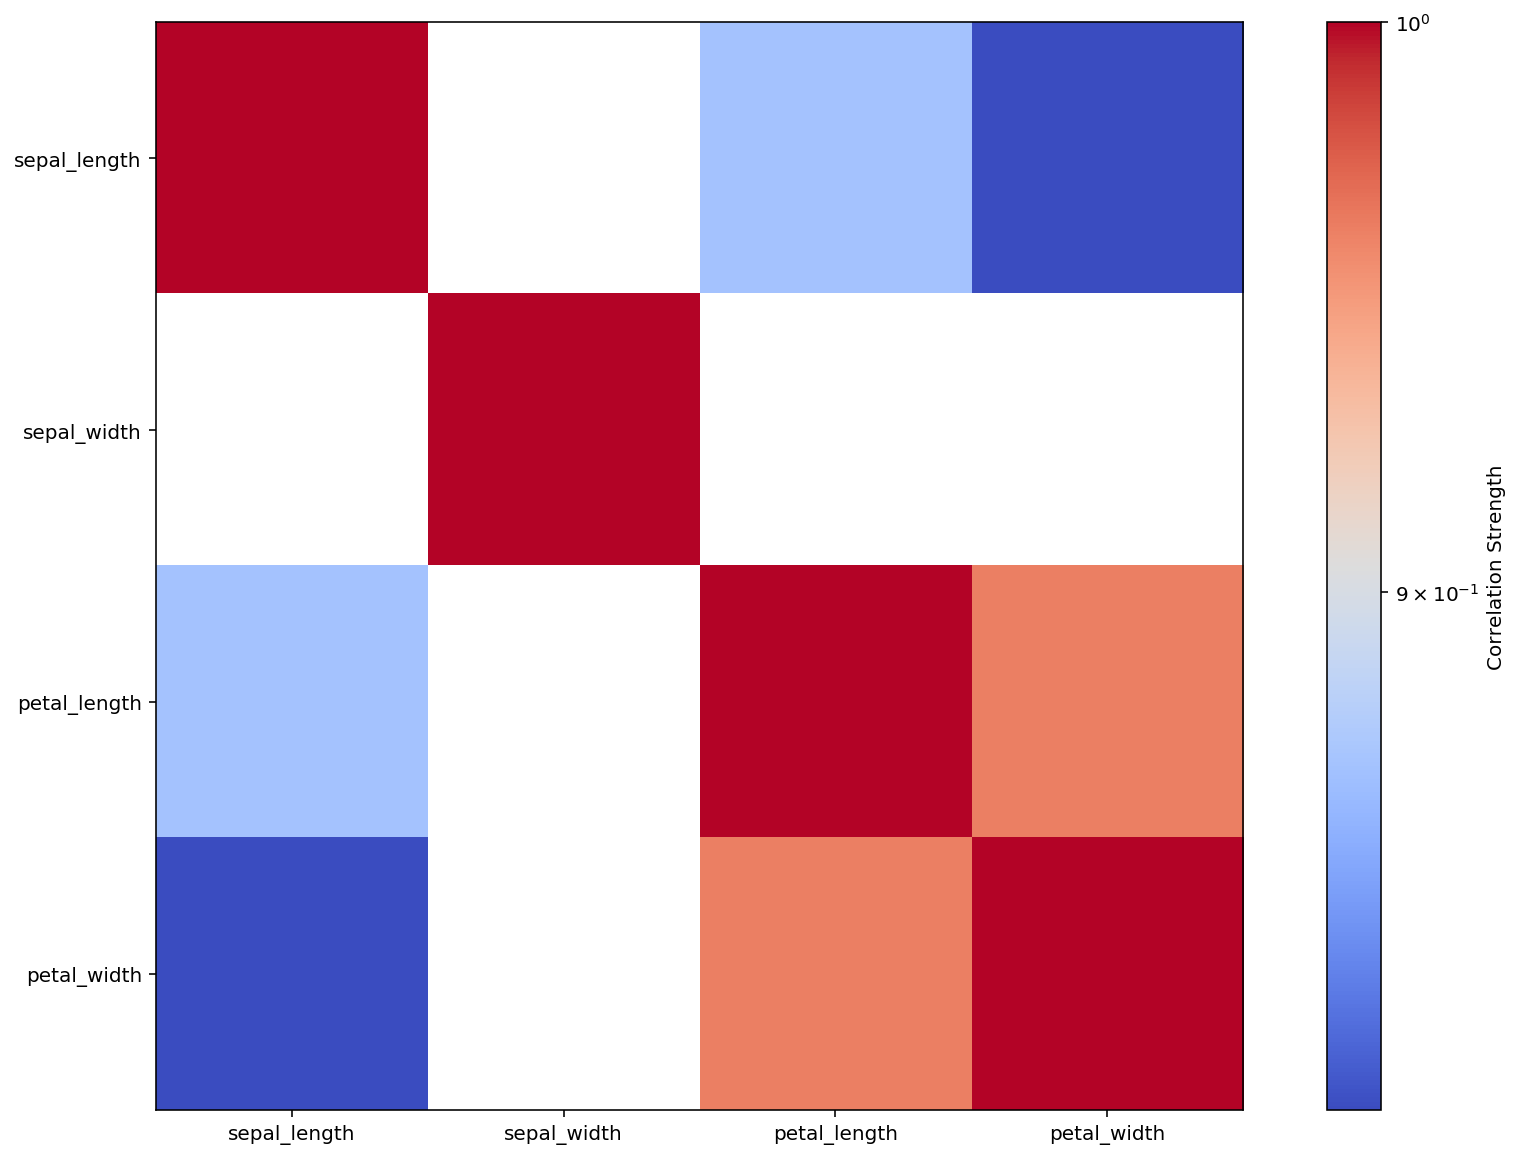

In [38]:
f, ax = plt.subplots(figsize = (15,10))
cax = ax.imshow(iris_df.corr(),
                cmap = 'coolwarm',
                norm = LogNorm()
               )

# Set the labels
ax.set_xticks(range(4))
ax.set_xticklabels(iris_df.columns[0:4])
ax.set_yticks(range(4))
ax.set_yticklabels(iris_df.columns[0:4])

# Alter the colorbar by adding a label
cbar = f.colorbar(cax)
cbar.set_label('Correlation Strength')
plt.show()

And...that's it for plot types. Now I'm going to transition to some formatting things

## Formatting Plots

There's a few cases I want to cover here, all of which have come up thus far in my analyses:

* Creating Subplots
* Drawing grid lines
* Adding horizontal/vertical lines
* Using multiple y axes

I'll cover each one in turn

### Creating Subplots

Often, I find myself wanting to actually create multiple plots on the same figure. This is pretty easy...for instance, here's creating a 2 x 1:

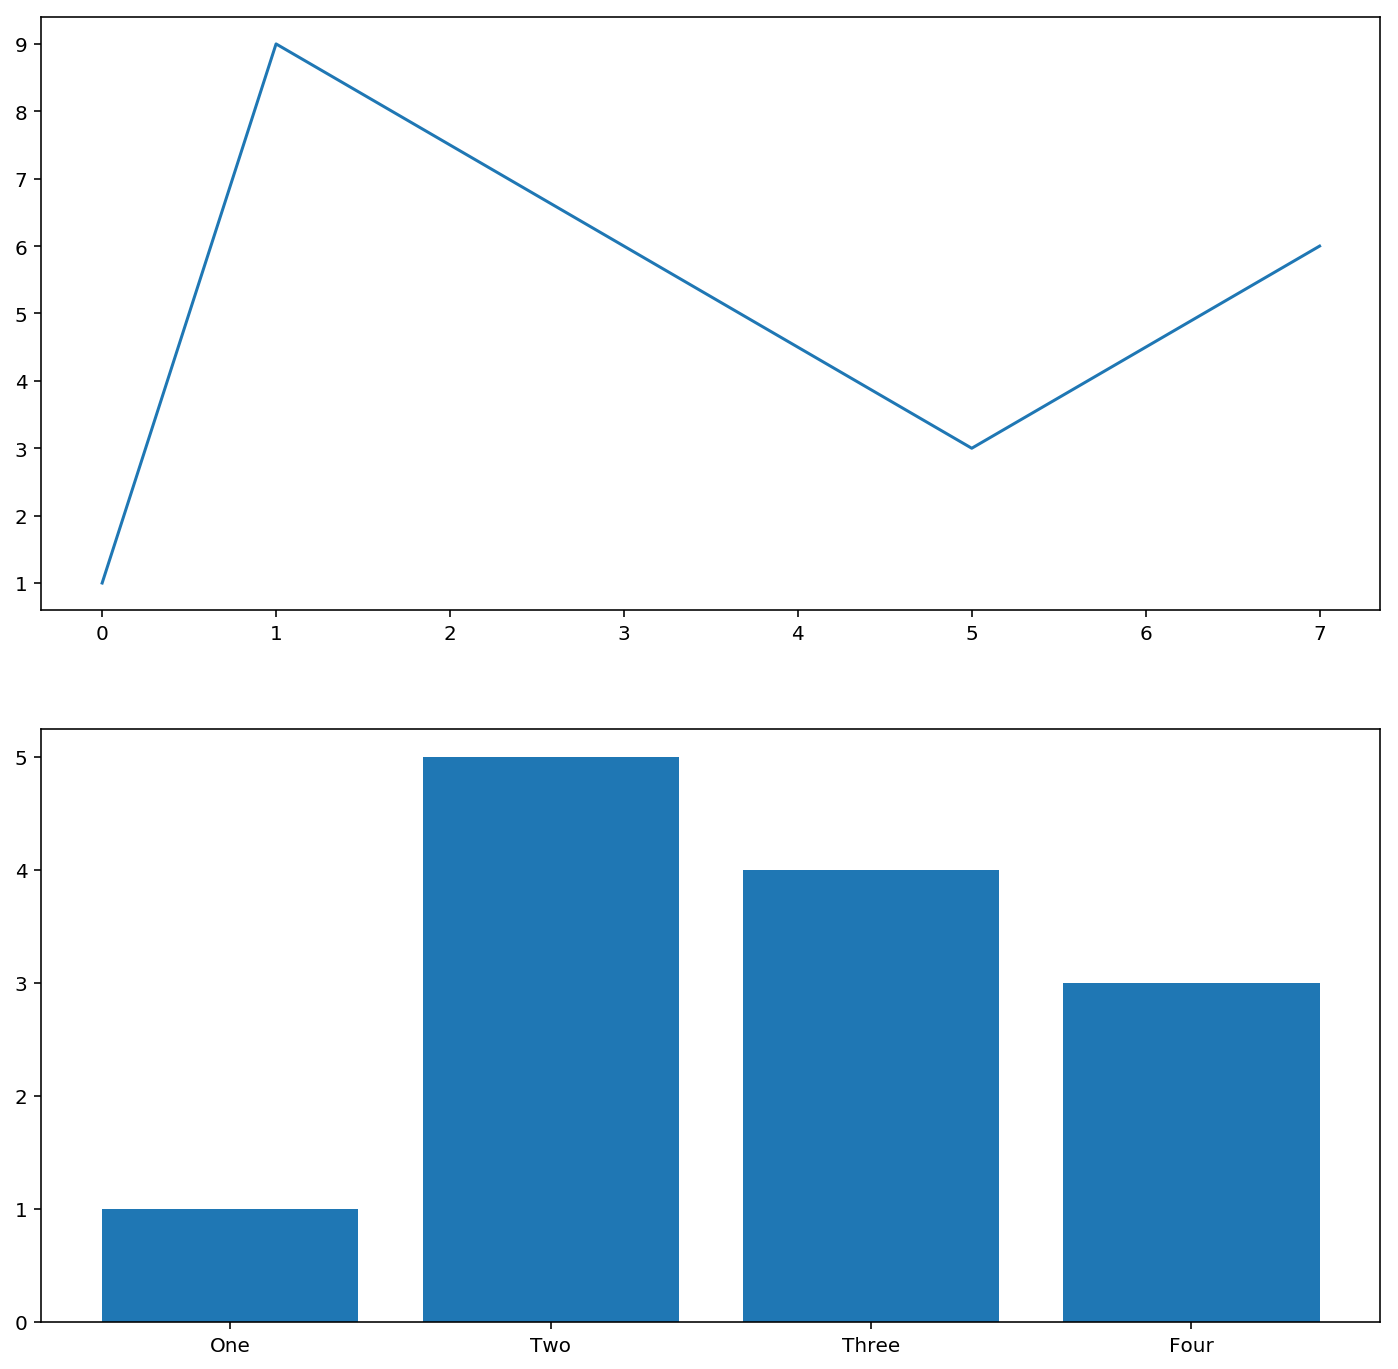

In [39]:
# Make a 2x1 subplot
fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (12,12))

# On the first, make a simple line plot
ax1.plot([0, 1, 5, 7], [1, 9, 3, 6])

# On the second, make a simple bar plot
ax2.bar(['One','Two','Three','Four'], [1,5,4,3])

# Plot it all
plt.show()

I can also create a 4 x 4 plot, which requires a bit more tuple manipulation:

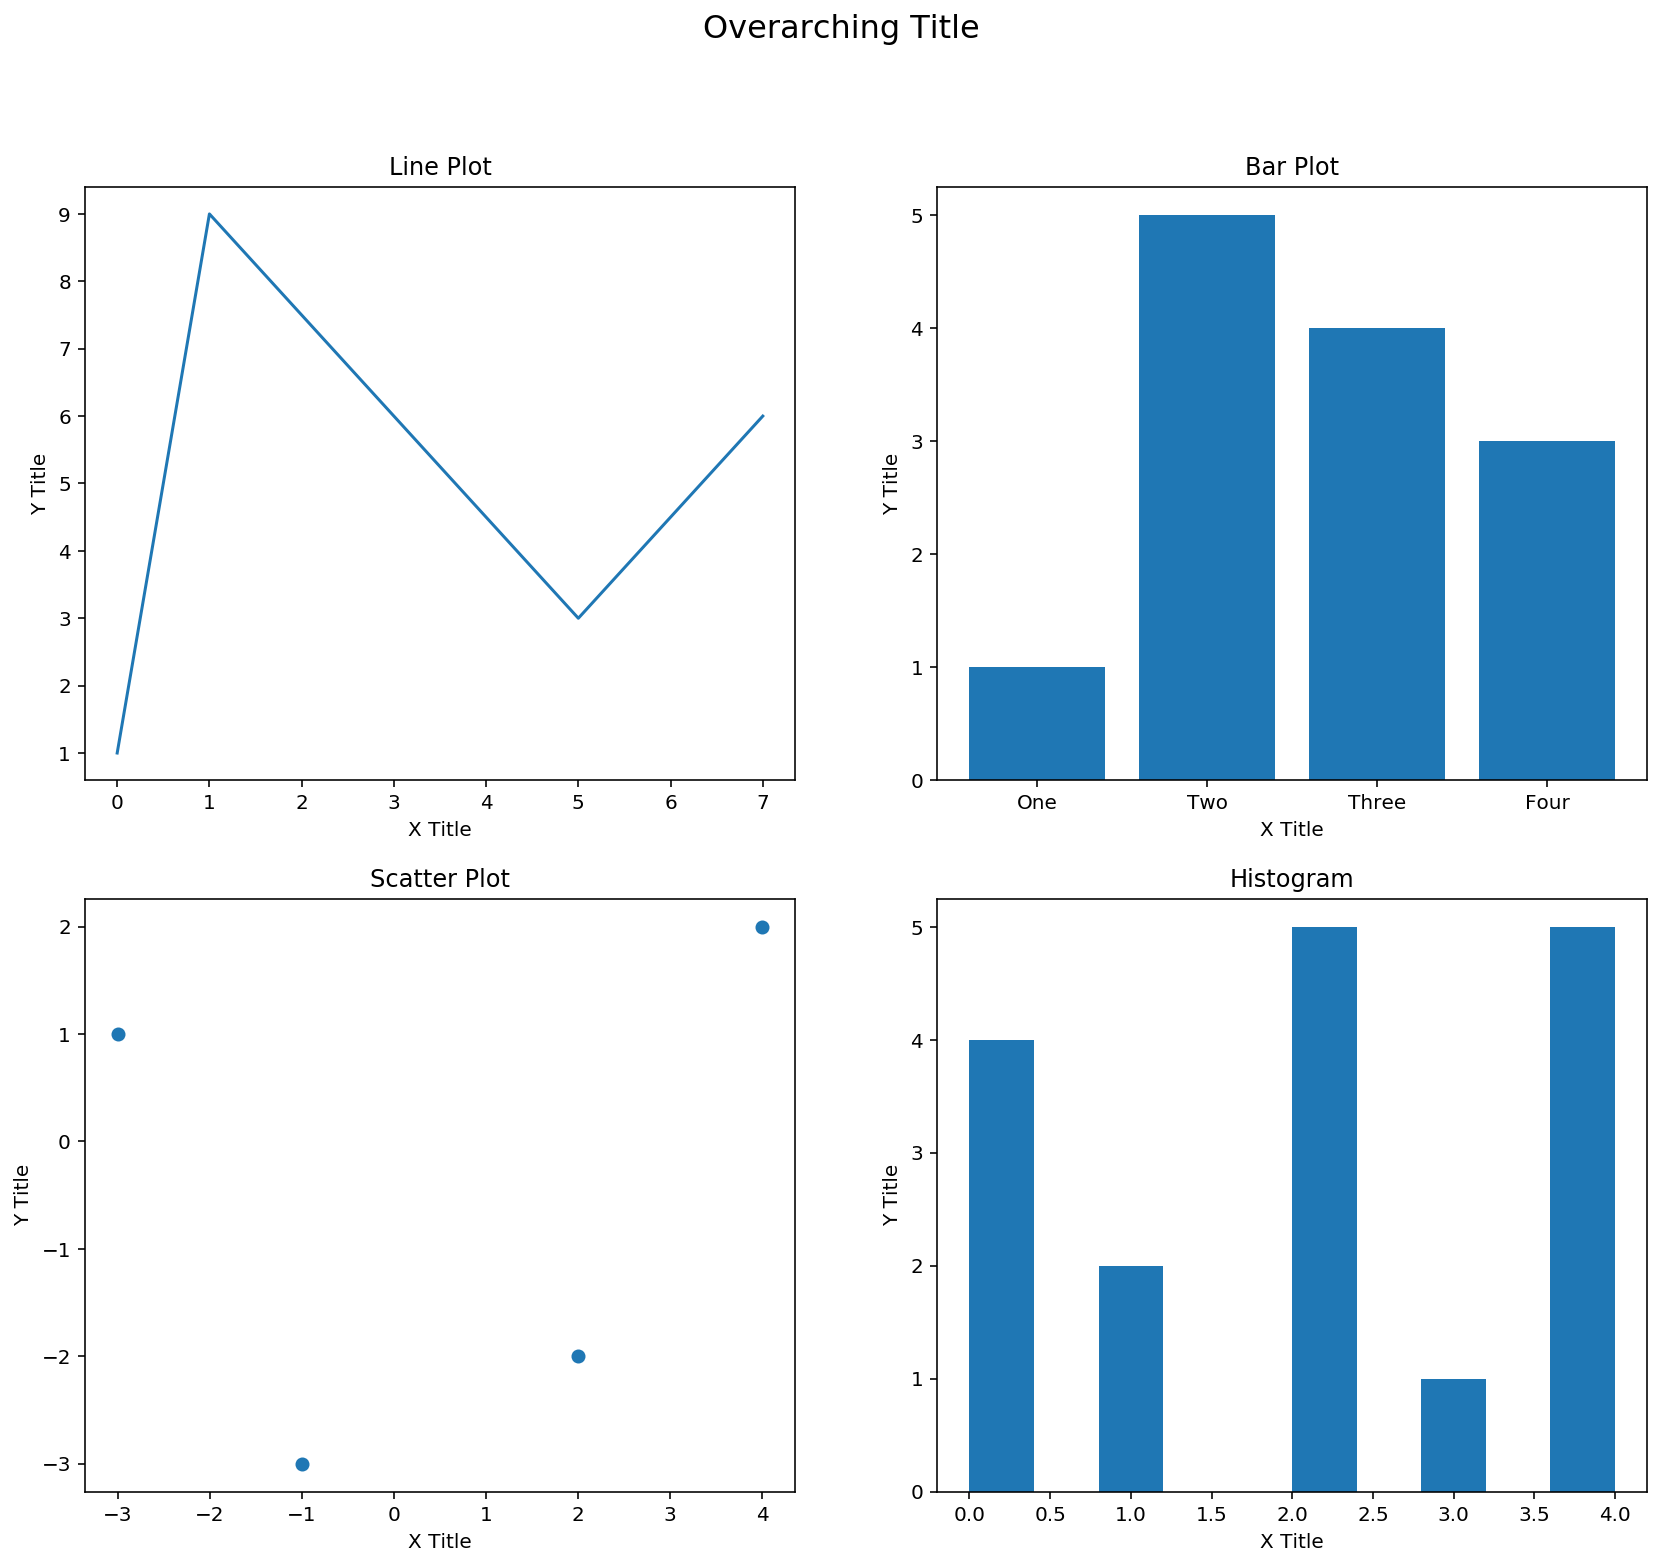

In [40]:
# Make a 2x1 subplot
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize = (14,12))

# On the first, make a simple line plot
ax1.plot([0, 1, 5, 7], [1, 9, 3, 6])
ax1.set_title('Line Plot')
ax1.set_xlabel('X Title')
ax1.set_ylabel('Y Title')

# On the second, make a simple bar plot
ax2.bar(['One','Two','Three','Four'], [1,5,4,3])
ax2.set_title('Bar Plot')
ax2.set_xlabel('X Title')
ax2.set_ylabel('Y Title')

# On the third, make a simple scatter
ax3.scatter([-1, 4, -3, 2],
            [-3, 2, 1, -2])
ax3.set_title('Scatter Plot')
ax3.set_xlabel('X Title')
ax3.set_ylabel('Y Title')

# On the fourth, make a histogram
ax4.hist([0,0,0,0,1,1,2,2,2,2,2,3,4,4,4,4,4])
ax4.set_title('Histogram')
ax4.set_xlabel('X Title')
ax4.set_ylabel('Y Title')

# Make an over-arching Title
fig.suptitle('Overarching Title', fontsize = 16)

# Plot it all
plt.show()

That should be enough examples to use these later; now I'll move on to the grid lines

### Adding Gridlines

This is super easy, but I want to show a set of options. 

First, adding both horizontal and vertical gridlines:

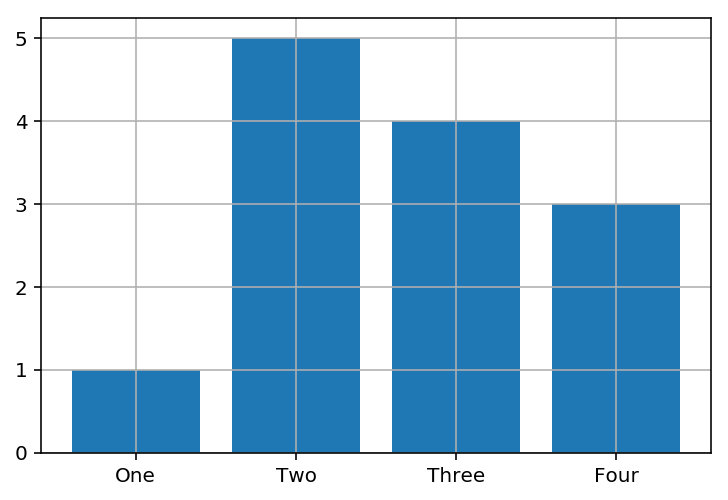

In [41]:
# Add solid grids to both axes
plt.bar(['One','Two','Three','Four'], [1,5,4,3])
plt.grid()
plt.show()

Now, adding just a horizontal grid, which I'll make dotted:

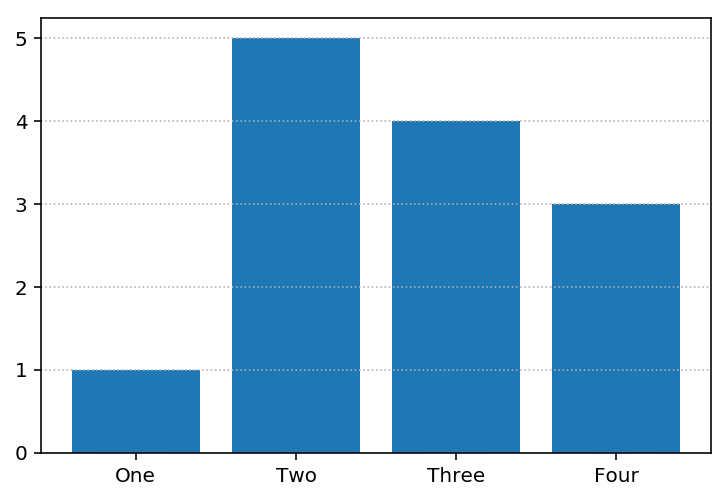

In [42]:
# Add dotted grid to y-axis
plt.bar(['One','Two','Three','Four'], [1,5,4,3])
plt.grid(axis = 'y', linestyle = ':')
plt.show()

And now a vertical axis, which I'll make dashed

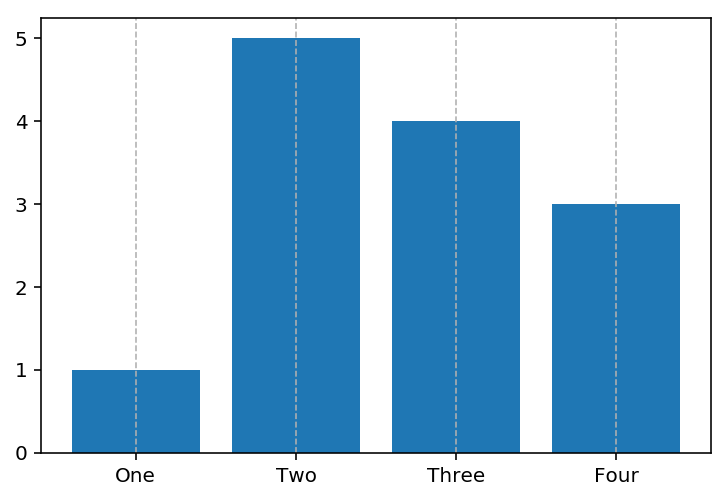

In [43]:
# Add dashed grid to x-axis
plt.bar(['One','Two','Three','Four'], [1,5,4,3])
plt.grid(axis = 'x', linestyle = '--')
plt.show()

That's a good job covering the grid lines...now a similar vein: vertical and horizontal lines

### Adding Vertical/Horizontal Lines

This is fairly easy:

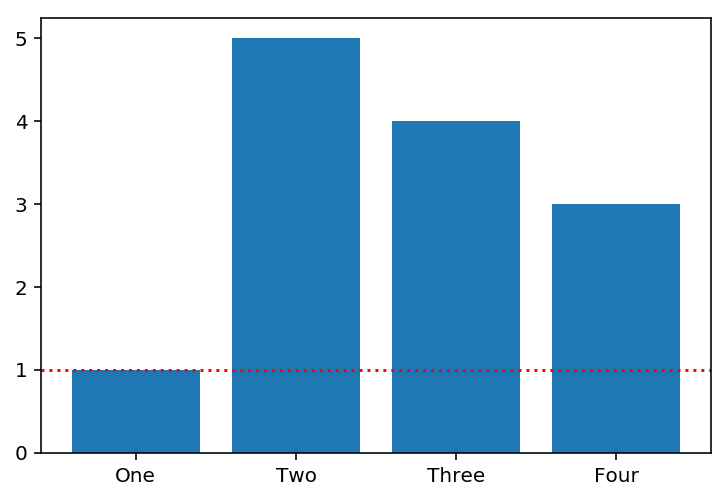

In [44]:
# Add dashed red horizontal line
plt.bar(['One','Two','Three','Four'], [1,5,4,3])
plt.axhline(y=1, color = 'r', linestyle = ':')
plt.show()

Similar for vertical line

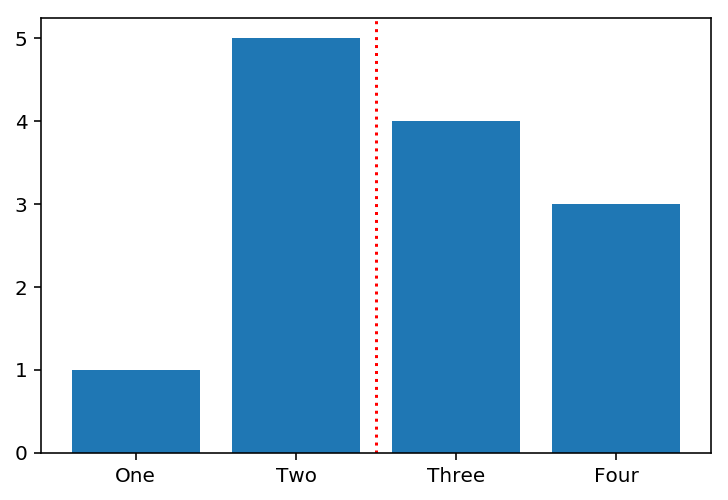

In [45]:
# Add dashed red horizontal line
plt.bar(['One','Two','Three','Four'], [1,5,4,3])
plt.axvline(x=1.5, color = 'r', linestyle = ':')
plt.show()

Those are the only 2 options! Time to move to the twin axes:

### Multiple Y-axes

This is a really useful thing to know. I'll just do it once:

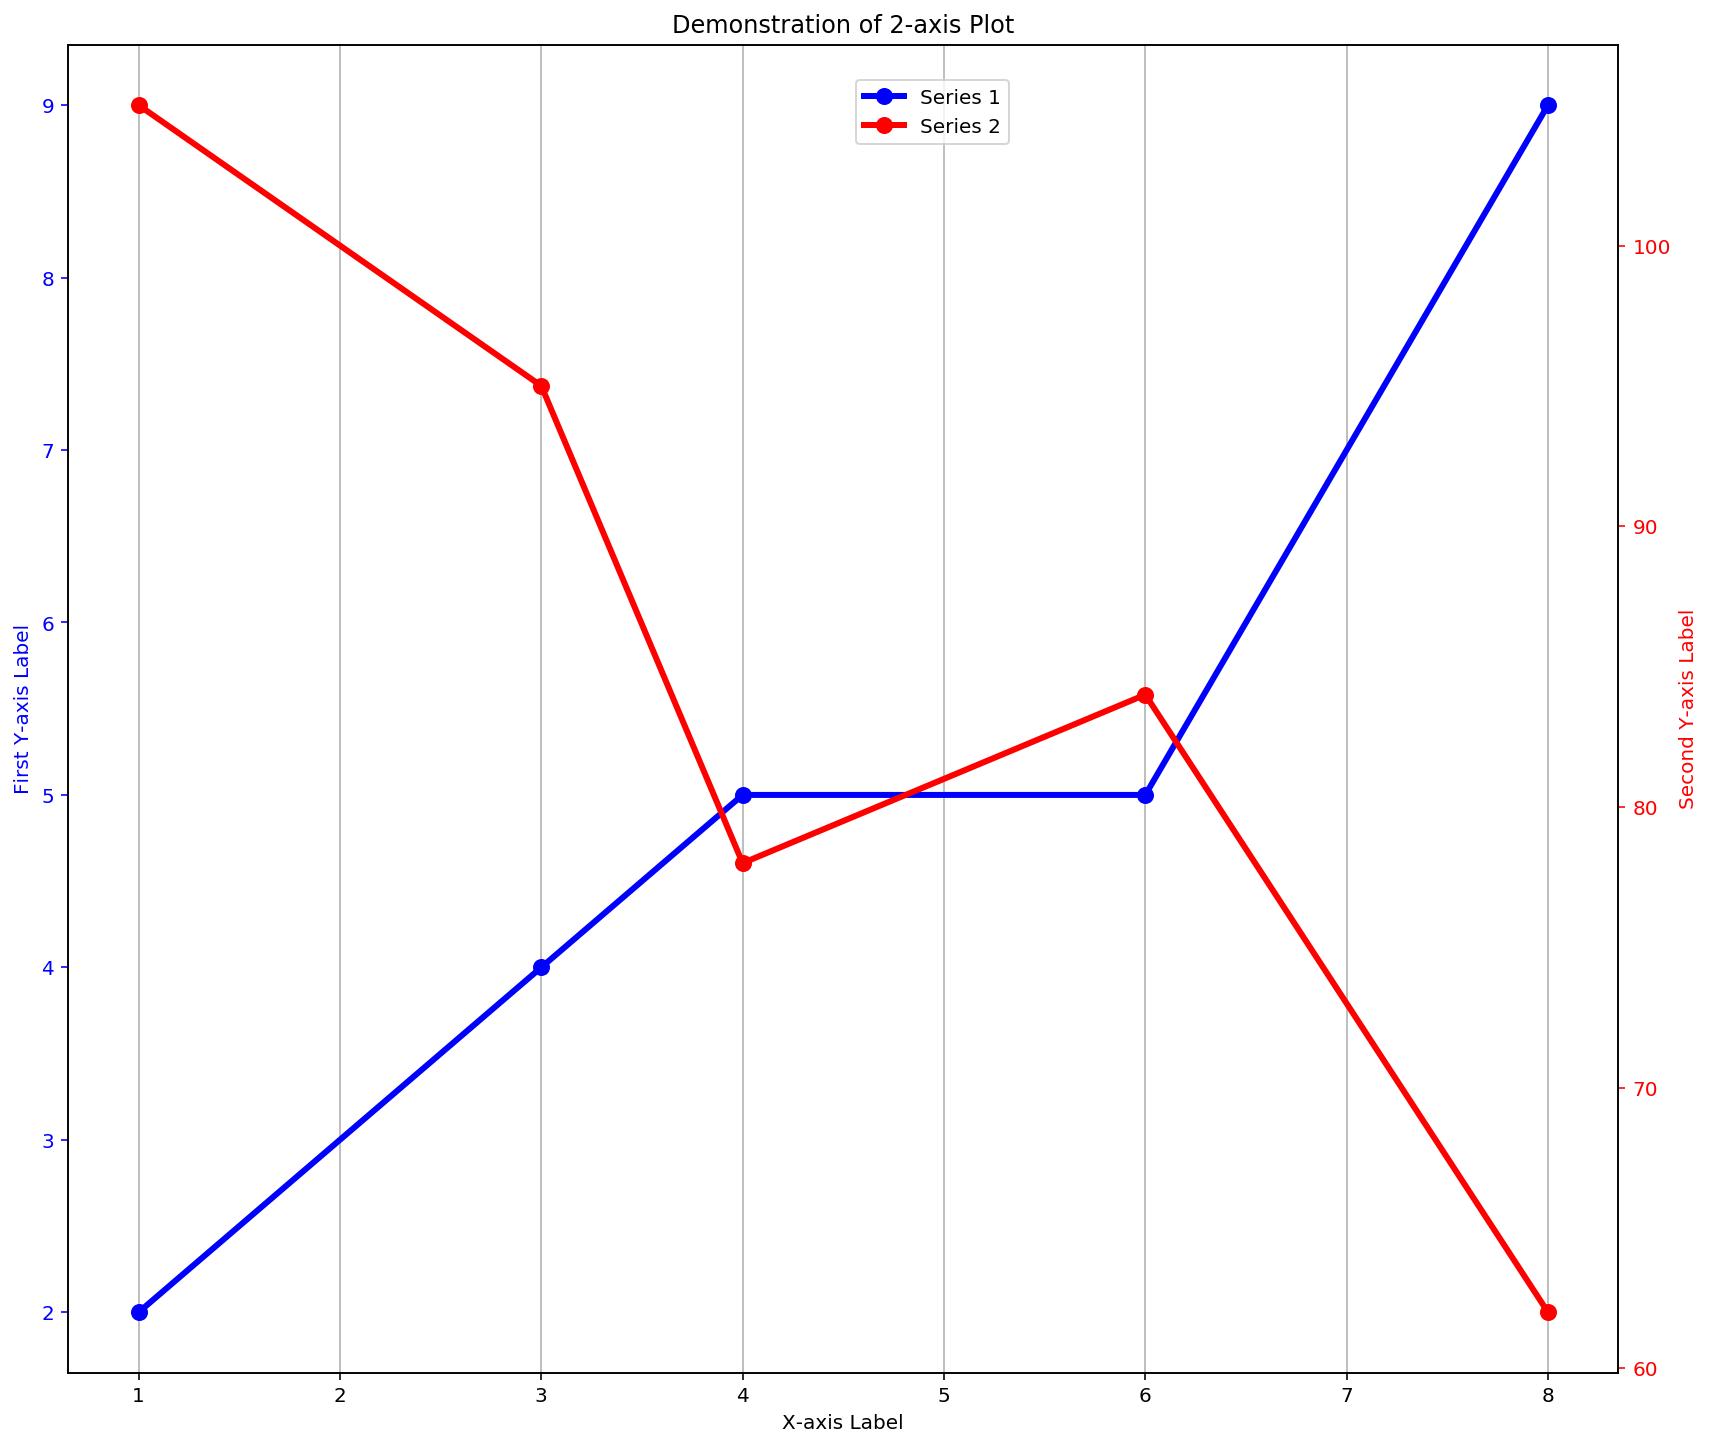

In [46]:
# Create the plot, grabbing the first axis
fig, ax1 = plt.subplots(figsize = (12,10))

# Create the plot itself in blue
ax1.plot([1, 3, 4, 6, 8], [2, 4, 5, 5, 9],
         'b-', linewidth = 3,
         marker = '.', markersize = 15)

# Set the universal x axis label and make a grid
ax1.set_xlabel('X-axis Label')
ax1.grid(True, axis = 'x')

# Set the y-axis label, ticks and tick labels to match the line color.
ax1.set_ylabel('First Y-axis Label', color='b')
ax1.tick_params('y', colors='b')


# Create the second axis
ax2 = ax1.twinx()

# Create the plot itself in red
ax2.plot([1, 3, 4, 6, 8], [105, 95, 78, 84, 62],
         'r-', linewidth = 3,
         marker = '.', markersize = 15)

# Set the y-axis label, ticks, and tick labels to match the line color
ax2.set_ylabel('Second Y-axis Label', color='r')
ax2.tick_params('y', colors='r')

fig.tight_layout()
plt.title('Demonstration of 2-axis Plot')
fig.legend(['Series 1','Series 2'], loc = (0.5,0.9))
plt.show()